In [1]:
import sys 
import numpy as np
import scipy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing
from statannotations.Annotator import Annotator
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter

In [2]:
import COP_utils as cutils

In [3]:
# import importlib

In [4]:
# importlib.reload(cutils)

### load exp data

In [5]:
data_df = pd.read_excel('Supplementary Data 1.xlsx', index_col=0)

## spider data

### define new columns magnitude for spiders

In [6]:
antigens_group_dict= {'Wuhan': {'S1wS2_Wuhan_Hu-1':'S1+S2', 'S1': 'S1', 'RBD': 'RBD', 'RBD_Wuhan_Hu-1':'RBD(1)'},
                 'Variants':{'S1wS2_B.1.1.1':'B.1.1.1', 'S1wS2_A.23.1':'A.23.1', 'S1wS2_B.1.1.7':'Alpha', 'S1wS2_B.1.351': 'Beta',  
                             'S1wS2_P1':'Gamma', 'S1wS2_Delta':'Delta', 'S1wS2_AY.2':'AY.2', 'S1wS2_B.1.526':'Iota', 'S1wS2_Kappa':'Kappa',
                             'S1wS2_B.1.621': 'Mu', 'S1wS2_Theta':'Theta', 'S1wS2_R.1':'R.1'}, 
                 'Mutants':{'RBD_V483A': 'V483A','RBD_K417N/E484K/N501Y': 'K417N/\nE484K/\nN501Y','RBD_L452R': 'L452R', 'RBD_N440K': 'N440K'}}

abb_dict = {'S1wS2_Wuhan_Hu-1':'S1+S2', 'S1': 'S1', 'RBD': 'RBD', 'RBD_Wuhan_Hu-1':'RBD(1)', 'S1wS2_B.1.1.1':'B.1.1.1', 'S1wS2_A.23.1':'A.23.1', 
            'S1wS2_B.1.1.7':'Alpha', 'S1wS2_B.1.351': 'Beta', 'S1wS2_P1':'Gamma', 'S1wS2_Delta':'Delta', 'S1wS2_AY.2':'AY.2', 'S1wS2_B.1.526':'Iota', 
            'S1wS2_Kappa':'Kappa', 'S1wS2_B.1.621': 'Mu', 'S1wS2_Theta':'Theta', 'S1wS2_R.1':'R.1', 'RBD_V483A': 'V483A',
            'RBD_K417N/E484K/N501Y': 'K417N/\nE484K/\nN501Y','RBD_L452R': 'L452R', 'RBD_N440K': 'N440K'}

In [7]:
abb_o_dict = {}
for k in abb_dict.keys():
    abb_o_dict[abb_dict[k]] = k 

In [8]:
sorted_strain_dict_for_spiders = {}
for k in antigens_group_dict.keys():
    sorted_strain_dict_for_spiders[k] = pd.Index(antigens_group_dict[k].keys()).map(lambda x: 'SARS-COV-2_' + x + '_AUC_normalized')

In [9]:
curr_idx = data_df[data_df['time point'] == 'T0'].index.map(lambda x: x.split('_')[0]).intersection(data_df[data_df['time point'] == 'T1'].index.map(lambda x: x.split('_')[0]))
t0_t1_idx = (curr_idx + '_BL').append(curr_idx + '_FU1')

auc_columns_normed = data_df.columns[data_df.columns.str.contains('AUC normalized')]
scov2_array_columns = data_df.columns[(data_df.columns.str.contains('Antigen Microarray SARS-COV-2')) & (data_df.columns.str.contains('AUC normalized'))]
spider_df_columns = scov2_array_columns.str[:-4].str.replace('Antigen Microarray ','').str.replace(' ', '_').unique()
gen_columns = pd.Index(['vaccinated', 'infected T1', 'time point'])

In [10]:
spider_df = pd.DataFrame(index = (t0_t1_idx + '_IgG').append(t0_t1_idx + '_IgA'), columns = spider_df_columns.append(gen_columns))

for isotype in ['IgG', 'IgA']:
    spider_df.loc[t0_t1_idx + '_' + isotype, spider_df_columns] = data_df.loc[t0_t1_idx, 'Antigen Microarray ' + spider_df_columns.str.replace('_',' ') + ' ' + isotype].astype(float).values.copy()   
    spider_df.loc[t0_t1_idx + '_' + isotype, gen_columns] = data_df.loc[t0_t1_idx, gen_columns].values.copy()
    spider_df.loc[t0_t1_idx + '_' + isotype, 'isotype'] = isotype
spider_df[spider_df_columns] = spider_df[spider_df_columns].astype(float)

In [11]:
cutils.compute_breadth_and_magnitude_summary_stats(spider_df, list(sorted_strain_dict_for_spiders.keys()), list(sorted_strain_dict_for_spiders.keys()), 
                                                    ind_dict=sorted_strain_dict_for_spiders, pos_threshold=2000, compute_gmean_mag=True, compute_breadth=True)


SARS-COV-2_S1wS2_A.23.1_AUC_normalized  \
idx                                                        
0404-001_BL_IgG                                 0.790537   
0404-003_BL_IgG                                 0.751823   
0404-004_BL_IgG                                 1.431059   
0404-005_BL_IgG                                 1.252814   
0404-006_BL_IgG                                 1.913897   
...                                                  ...   
0404-293_FU1_IgA                                0.483287   
0404-296_FU1_IgA                                0.021791   
0404-298_FU1_IgA                                0.041895   
0404-299_FU1_IgA                                0.442136   
0404-300_FU1_IgA                                0.070171   

                  SARS-COV-2_RBD_Alpha_AUC_normalized  \
idx                                                     
0404-001_BL_IgG                              0.983052   
0404-003_BL_IgG                              0.822500   
0404-004_BL_IgG                              0.927363   
0404-005_BL_IgG                              0.990484   
0404-006_BL_IgG                              0.940020   
...                                               ...   
0404-293_FU1_IgA                             1.845633   
0404-296_FU1_IgA                             0.285733   
0404-298_FU1_IgA                             0.132507   
0404-299_FU1_IgA                             0.285654   
0404-300_FU1_IgA                             0.057089   

                  SARS-COV-2_S1wS2_AY.2_AUC_normalized  \
idx                                                      
0404-001_BL_IgG                               0.145806   
0404-003_BL_IgG                               0.326972   
0404-004_BL_IgG                               0.262951   
0404-005_BL_IgG                               0.337474   
0404-006_BL_IgG                               0.730958   
...                                                ...   
0404-293_FU1_IgA                              0.332220   
0404-296_FU1_IgA                              0.021791   
0404-298_FU1_IgA                              0.019152   
0404-299_FU1_IgA                              0.184123   
0404-300_FU1_IgA                              0.047574   

                  SARS-COV-2_S1wS2_B.1.1.1_AUC_normalized  \
idx                                                         
0404-001_BL_IgG                                  0.337754   
0404-003_BL_IgG                                  0.306823   
0404-004_BL_IgG                                  0.321357   
0404-005_BL_IgG                                  0.485338   
0404-006_BL_IgG                                  1.118516   
...                                                   ...   
0404-293_FU1_IgA                                 0.296011   
0404-296_FU1_IgA                                 0.021791   
0404-298_FU1_IgA                                 0.009576   
0404-299_FU1_IgA                                 0.197522   
0404-300_FU1_IgA                                 0.047574   

                  SARS-COV-2_S1wS2_B.1.1.7_AUC_normalized  \
idx                                                         
0404-001_BL_IgG                                  0.275662   
0404-003_BL_IgG                                  0.178725   
0404-004_BL_IgG                                  0.221813   
0404-005_BL_IgG                                  0.368006   
0404-006_BL_IgG                                  0.815268   
...                                                   ...   
0404-293_FU1_IgA                                 0.231720   
0404-296_FU1_IgA                                 0.021791   
0404-298_FU1_IgA                                 0.009576   
0404-299_FU1_IgA                                 0.332144   
0404-300_FU1_IgA                                 0.047574   

                  SARS-COV-2_S1wS2_B.1.351_AUC_normalized  \
idx                                                         
0404-001_BL_IgG               

### ranked samples by magnitude for each group

In [12]:
spider_group_dict = {}

selected_summary_stats = ['Wuhan_magnitude', 'Variants_magnitude', 'Mutants_magnitude']

for isotype in ['IgG', 'IgA']:
    curr_df = spider_df[(spider_df['time point']=='T0') & (spider_df.isotype==isotype)].copy()
    columns_dict = {'vaccinated': (curr_df['vaccinated'] == 'yes'), 'unvaccinated': (curr_df['vaccinated'] == 'no'),
                'uninfected_T1': (curr_df['infected T1'] == 'no'), 'infected_T1': (curr_df['infected T1'] == 'yes')}

    for group_idx in ['all-vaccinated-uninfected_T1', 'all-unvaccinated-uninfected_T1', 'all-vaccinated-infected_T1', 'all-unvaccinated-infected_T1',
                      'vaccinated-uninfected_T1', 'vaccinated-infected_T1', 'unvaccinated-uninfected_T1', 'unvaccinated-infected_T1']:
        spider_group_dict[(isotype, group_idx)] = {}
        subgroup = group_idx.split('-')
        if subgroup[0] == 'all':
            df = curr_df[columns_dict[subgroup[1]]&columns_dict[subgroup[2]]].copy()
        else:
            df = curr_df[columns_dict[subgroup[0]] & columns_dict[subgroup[1]]].copy()
        temp_df = cutils.compute_groups_quantiles_for_antigens(df=df, isotype=isotype, antigens=selected_summary_stats)
        for mag in selected_summary_stats:
            spider_group_dict[(isotype, group_idx)][mag]={}
            if subgroup[0] == 'all':
                spider_group_dict[(isotype, group_idx)][mag]={'all':df.index}
            else:
                for val in ['high', 'mid', 'low']:
                    spider_group_dict[(isotype, group_idx)][mag][val] = temp_df[temp_df[mag+'_response_group_'+isotype] == val].index

## ranking data

In [13]:
curr_columns = data_df.columns[(data_df.columns.str.contains('magnitude'))].append(pd.Index(['result 2 SARS-COV-2 S2 IgG BioPlex', 
                                                                                             'result 1 SARS-COV-2 RBD IgG Alinity']))

low_high_infection_summary_stats_T1 = {}
significant_antigens = {'IgG_vaccinated': [], 'IgG_unvaccinated': [],
                        'IgA_vaccinated': [], 'IgA_unvaccinated': []}   # Lilach added

for vaccinated, vac_str in zip(['yes', 'no'], ['vaccinated', 'unvaccinated']):
    for isotype in ['IgA', 'IgG']:
        cols = curr_columns[curr_columns.str.contains(isotype)] 
        curr_data = data_df[data_df['time point'] == 'T0'][cols.append(pd.Index(['infected T1', 'vaccinated', 'time point']))].copy()
        curr_data.loc[:, 'isotype'] = isotype
        for a in cols:
            odds, p, curr_df, infection_stats = cutils.compute_response_groups_by_antigen(df=curr_data, antigen=a, isotype=isotype, time_column='time point', 
                                                                                    vaccinated=vaccinated, infected_col='infected T1', 
                                                                                    quantiles=[0.25, 0.75], p_threshold=0.15, print_flag=False)

            low_high_infection_summary_stats_T1[(isotype, vac_str, a)] = (odds, p, curr_df, infection_stats)


### spider plot setting

In [14]:
spoke_labels = pd.Index([])
antigen_sizes = []
antigen_labels = [] 
curr_columns = pd.Index([])
antigen_labels = ['Mutants', 'Variants', 'Wuhan']

for k in antigen_labels:
    curr_antigens = sorted_strain_dict_for_spiders[k]
    curr_antigen_names = curr_antigens.str.replace('SARS-COV-2_', '').str.replace('_AUC_normalized','')
    spoke_labels = spoke_labels.append(pd.Index(curr_antigen_names))
    
    curr_columns = curr_columns.append(pd.Index(curr_antigens))
    
    antigen_sizes.append(len(curr_antigens))


theta = cutils.radar_factory(len(spoke_labels), frame='polygon')
spoke_labels = pd.Index([abb_dict[x] if x in abb_dict else x for x in spoke_labels])

spider_columns = curr_columns


In [15]:
# colors for antibodies (spider charts) - for baseline only spiders
all_antibodies= ['IgG', 'IgA']#, 'IgG_according_IgA', 'IgA_according_IgG']
color_plate = sns.color_palette("colorblind")
Ab_colors_dict = {}
for count, item in enumerate(all_antibodies):
    Ab_colors_dict[item] = color_plate[count]
Ab_colors_dict


# colors for donuts
color_plate_donuts= sns.color_palette("tab10") # dark or bright or tab10
selected_positions = [0, 3, 8]
donut_colors_v1 = [color_plate_donuts[i] for i in selected_positions]
donut_colors_v1


# colors for timepoints for T0+T1 spiders
all_timepoints = ['T0', 'T1']
legend_labels = ['day 0', 'day 30']
timepoint_colors_dict2 = {'T0': '#E833BD', 'T1': '#2CCA5B'}  # magenta-green


### create df only with relevant data for spider

In [16]:
# spider_columns = spoke_labels.map(lambda x: abb_o_dict[x] + '_AUC_normalized')
spider_IgG_idx = spider_df[spider_df.isotype == 'IgG'].index
spider_IgA_idx = spider_df[spider_df.isotype == 'IgA'].index

### normalize seperately IgG and IgA mean values

In [17]:
spider_n_IgG_df, l  = cutils.collect_spider_data_LF(spider_df.loc[spider_IgG_idx], spider_IgG_idx,spider_columns)
spider_n_IgA_df, l  = cutils.collect_spider_data_LF(spider_df.loc[spider_IgA_idx], spider_IgA_idx,spider_columns)

In [18]:
normalize_spider_df = pd.concat([spider_n_IgG_df, spider_n_IgA_df])

### compute spiders mean values

In [19]:
spider_n_df = pd.DataFrame(columns = spider_columns)
curr_columns = spider_n_df.columns

for curr_dict in [spider_group_dict]:#, ranked_by_other_dict]:
    for first_k in curr_dict.keys():
        for second_k in curr_dict[first_k].keys():
            for group_k in curr_dict[first_k][second_k].keys():
                t0_idx = curr_dict[first_k][second_k][group_k]
                t1_idx = t0_idx.map(lambda x: x.replace('BL','FU1'))
                for time, idx in zip(['T0', 'T1'], [t0_idx, t1_idx]):
                    idx_str = ','.join([','.join(first_k), second_k, group_k, time])
                    spider_n_df.loc[idx_str, curr_columns] = normalize_spider_df.loc[idx, curr_columns].mean()
                    

### figures style

In [20]:
style_dict = {'spider':{'font.size':14, 'axes.titlesize':14, 'axes.labelsize':14, 'xtick.labelsize': 12, 
                                 'ytick.labelsize': 12, 'legend.fontsize': 14}, 
            'graph': {'font.size':18, 'axes.titlesize':22, 'axes.labelsize':19, 'xtick.labelsize': 18,  
                                 'ytick.labelsize': 18, 'legend.fontsize': 14}}

sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

In [21]:
strain_dict = {'SARS_Cov_2': pd.Index(['SARS_CoV_2_S1_AUC_normalized',
        'SARS_CoV_2_S1wS2_Wuhan_Hu-1_AUC_normalized',
        'SARS_CoV_2_RBD_Wuhan_Hu-1_AUC_normalized',
        'SARS_CoV_2_RBD_AUC_normalized'],
       dtype='object'),
 'Seasonal': pd.Index(['NL63_S1_AUC_normalized', 'OC43_S1wS2_AUC_normalized',
        '229E_S1_AUC_normalized', 'HKU1_S1_AUC_normalized'],
       dtype='object'),
 'MERS': pd.Index(['MERS_RBD_AUC_normalized', 'MERS_S1_AUC_normalized'], dtype='object'),
 'SARS_1': pd.Index(['SARS_S1_AUC_normalized'], dtype='object'),
 'Variants': pd.Index(['SARS_CoV_2_S1wS2_A.23.1_AUC_normalized',
        'SARS_CoV_2_S1wS2_AY.2_AUC_normalized',
        'SARS_CoV_2_S1wS2_B.1.1.1_AUC_normalized',
        'SARS_CoV_2_S1wS2_B.1.1.7_AUC_normalized',
        'SARS_CoV_2_S1wS2_B.1.351_AUC_normalized',
        'SARS_CoV_2_S1wS2_B.1.526_AUC_normalized',
        'SARS_CoV_2_S1wS2_B.1.621_AUC_normalized',
        'SARS_CoV_2_S1wS2_Delta_AUC_normalized',
        'SARS_CoV_2_S1wS2_Kappa_AUC_normalized',
        'SARS_CoV_2_S1wS2_P1_AUC_normalized',
        'SARS_CoV_2_S1wS2_R.1_AUC_normalized',
        'SARS_CoV_2_S1wS2_Theta_AUC_normalized'],
       dtype='object'),
 'Mutants': pd.Index(['SARS_CoV_2_S1_D614G_AUC_normalized',
        'SARS_CoV_2_S1_HV69_70del_AUC_normalized',
        'SARS_CoV_2_RBD_K417N/E484K/N501Y_AUC_normalized',
        'SARS_CoV_2_RBD_L452R_AUC_normalized',
        'SARS_CoV_2_RBD_N440K_AUC_normalized',
        'SARS_CoV_2_S1_P681H_AUC_normalized',
        'SARS_CoV_2_RBD_V483A_AUC_normalized',
        'SARS_CoV_2_S1_Y144del_AUC_normalized',
        'SARS_CoV_2_RBD_Beta_AUC_normalized'],
       dtype='object'),
 'S1_Mutants': pd.Index(['SARS_CoV_2_S1_D614G_AUC_normalized',
        'SARS_CoV_2_S1_HV69_70del_AUC_normalized',
        'SARS_CoV_2_S1_P681H_AUC_normalized',
        'SARS_CoV_2_S1_Y144del_AUC_normalized'],
       dtype='object'),
 'RBD_Mutants': pd.Index(['SARS_CoV_2_RBD_K417N/E484K/N501Y_AUC_normalized',
        'SARS_CoV_2_RBD_L452R_AUC_normalized',
        'SARS_CoV_2_RBD_N440K_AUC_normalized',
        'SARS_CoV_2_RBD_V483A_AUC_normalized'],
       dtype='object'),
 'RSV': pd.Index(['RSV_G_AUC_normalized'], dtype='object')}

## Fig.1

### Fig.1a

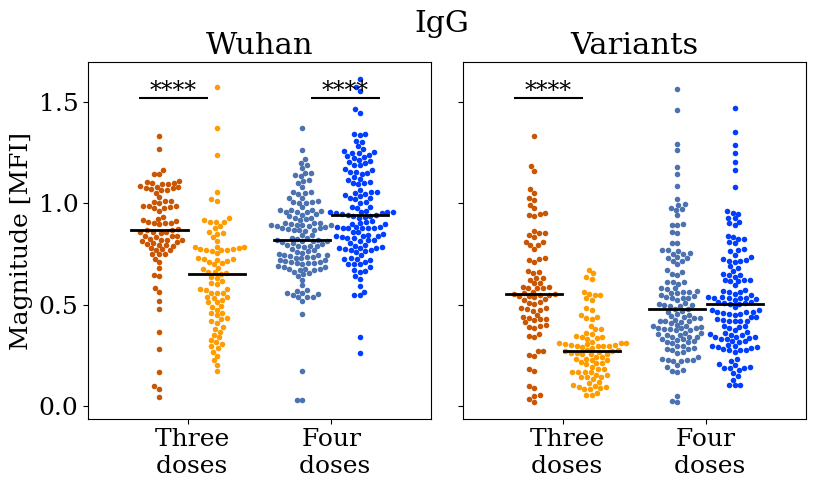

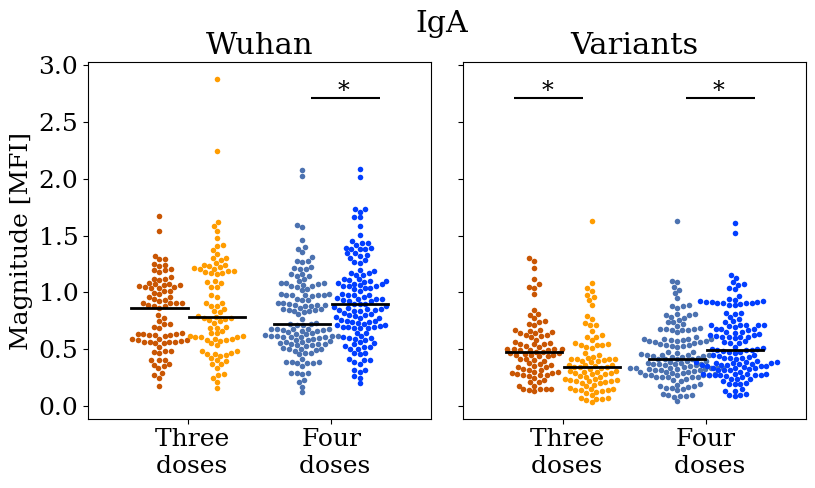

In [22]:
sns.set_context(style_dict["graph"])
curr_idx = data_df[data_df['time point'] == 'T0'].index.map(lambda x: x.split('_')[0]).intersection(data_df[data_df['time point'] == 'T1'].index.map(lambda x: x.split('_')[0]))
t0_t1_idx = (curr_idx + '_BL').append(curr_idx + '_FU1')
curr_strains  = pd.Index([' SARS Cov 2 magnitude ', ' Variants magnitude ']) 

curr_idx = data_df[data_df['time point'] == 'T0'].index.map(lambda x: x.split('_')[0]).intersection(data_df[data_df['time point'] == 'T1'].index.map(lambda x: x.split('_')[0]))
t0_t1_idx = (curr_idx + '_BL').append(curr_idx + '_FU1')
t0_t1_df = data_df.loc[t0_t1_idx]

# plot graphs for un-infected subjects:
for isotype in ['IgG', 'IgA']:
    curr_df = t0_t1_df[t0_t1_df['infected T1'] == 'no'].copy()
    strain_names = dict(zip('Antigen Microarray' + curr_strains + isotype, pd.Index(['Wuhan', 'Variants'])))
    for a in curr_strains:
        curr_col = 'Antigen Microarray' + a + isotype
        curr_df.loc[:, curr_col] = curr_df.loc[:, curr_col] / strain_dict[a[1:-1].replace(' magnitude', '').replace(' ', '_')].shape[0]
    
    f, ax = cutils.plot_antigen_boxplots_by_timepoints(df=curr_df, antigens='Antigen Microarray' + curr_strains + isotype , antigen_names=strain_names, group_column='vaccinated', 
                                                group_order=['no', 'yes'], hue_order=['T0', 'T1'], time_column='time point', y_scale=None, figsize=(8.5,5),
                                                showfliers=False, title=None, x_label='', sharey=True, annot=True,  legend=False,colormap={'d0_cmap':['#4c72b0','#c95603'], 
                                                                                                                                              'd30_cmap':['#023eff','#ff9c00']},
                                                savepath=None)
    
    ax[0].set_ylabel('Magnitude [MFI]')
    plt.suptitle(isotype, x=0.54, y=0.99)

### Fig.1b

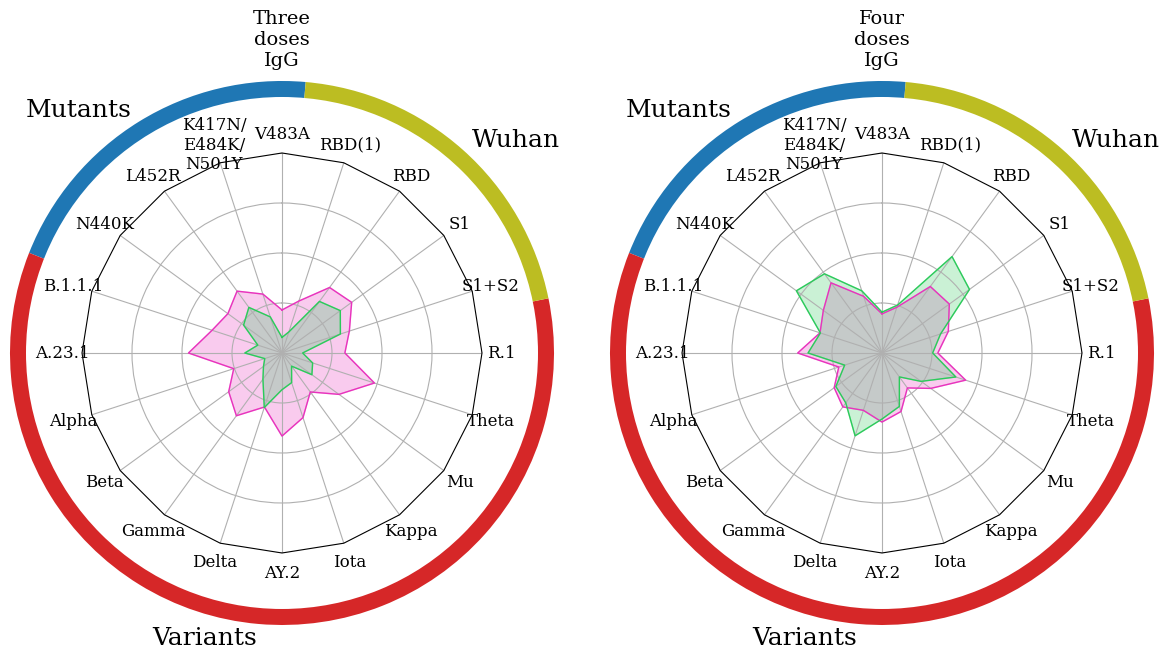

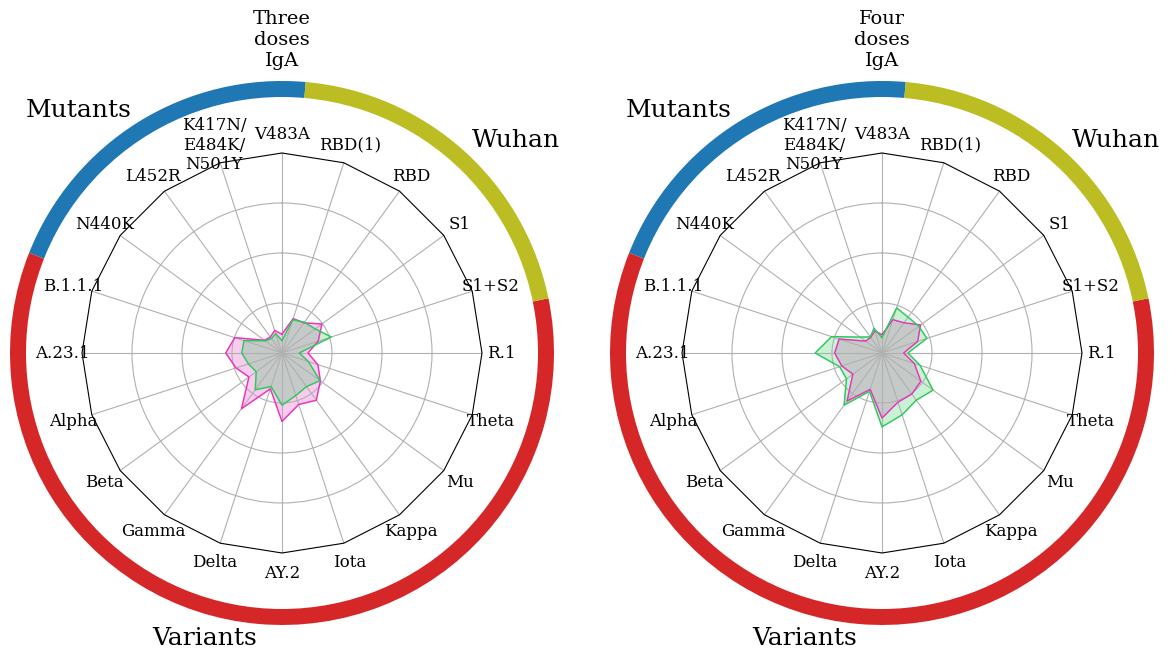

In [23]:
sns.set_context(style_dict["spider"])
all_timepoints = ['T0', 'T1']

for isotype in ['IgG', 'IgA']:
    f, ax = plt.subplots(1, 2, subplot_kw=dict(projection='radar'), figsize=(10, 5))
    f.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.95, wspace=0.5)

    for vac,curr_ax in zip(['all-unvaccinated-uninfected_T1', 'all-vaccinated-uninfected_T1'], ax.flatten()):

        sort_by = 'Mutants_magnitude'
        spider_group = 'all'
        curr_columns = spider_n_df.columns
        t0_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T0']), curr_columns]
        t1_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T1']), curr_columns]
        curr_data = np.array([t0_data.values.tolist(), t1_data.values.tolist()])
       

        cutils.plot_spiderplot_specific_colors(data = curr_data, curr_timepoints = all_timepoints, 
                                    all_timepoints = all_timepoints, 
                                    spoke_labels=spoke_labels.tolist(), title=None, 
                                    donut_sizes= [4.2, 12.2, 4.2],  #  or antigen_sizes
                                    start_angle=85, 
                        donut_labels=antigen_labels, donut_colors=donut_colors_v1,
                        max_value=1, figsize=(6,6), chart_radius=1.7, title_height = 1.27, diff_circles=0.1,
                        ptid_colors_dict = timepoint_colors_dict2, ax_handle=curr_ax, donut_labels_textprop={'size':18})
    ax[0].set_title('Three' + '\n' + 'doses' + '\n' + isotype, x=0.5, y=1.2)
    ax[1].set_title('Four' + '\n' + 'doses' + '\n' + isotype, x=0.5, y=1.2)


### Fig.1c

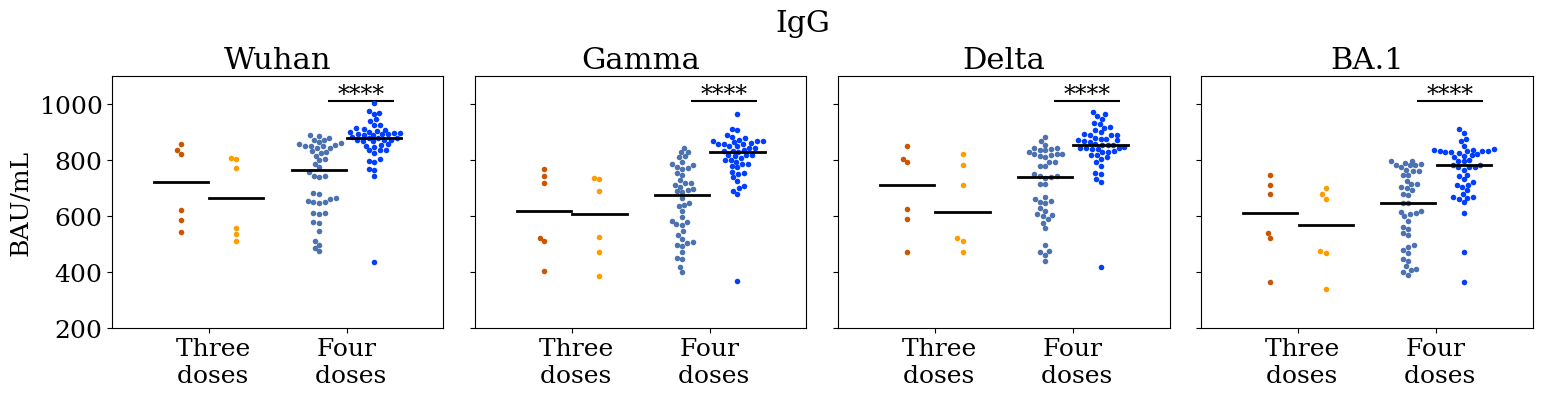

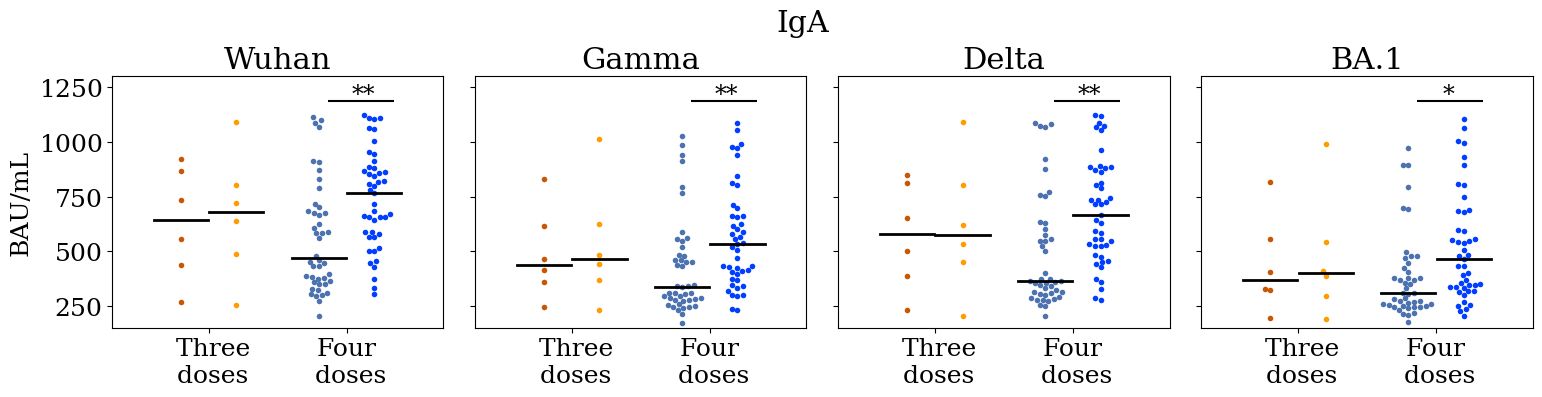

In [24]:
sns.set_context(style_dict["graph"])

elisa_cols = pd.Index(['ELISA Wuhan RBD', 'ELISA Gamma RBD', 'ELISA Delta RBD', 'ELISA Omicron BA.1 RBD'])
elisa_cols_str = pd.Index(['Wuhan', 'Gamma', 'Delta', 'BA.1'])
for isotype in ['IgG', 'IgA']:
 
    curr_cols = elisa_cols + ' ' + isotype + ' BAU/ml'
    curr_df = data_df[data_df['infected T1'] == 'no'][curr_cols.append(pd.Index(['vaccinated', 'time point']))].dropna().copy()
    cols_str = dict(zip(curr_cols, elisa_cols_str))
    f, ax = cutils.plot_antigen_boxplots_by_timepoints(df=curr_df, antigens=curr_cols, antigen_names=cols_str, group_column='vaccinated', 
                                                group_order=['no', 'yes'], hue_order=['T0', 'T1'], time_column='time point', legend=False, dot_size=4,
                                                y_scale=None, figsize=(16,4.5), showfliers=True, title=isotype, x_label='', sharey=True,
                                                colormap={'d0_cmap':['#4c72b0','#c95603'], 'd30_cmap':['#023eff','#ff9c00']}, savepath=None, annot=True)
    for a in ax:
        a.set_xticklabels(['  Three \n doses', ' Four \n doses'])
        a.set_xlabel('')
        
        if isotype == 'IgA':
            a.set_ylim([150, 1300])

        else:
            a.set_ylim([200, 1100])
            

        formatter = ticker.ScalarFormatter(useMathText=True) 
        a.yaxis.set_major_formatter(formatter) 
    
    ax[0].set_ylabel('BAU/mL')
    plt.suptitle(x=0.527,y=0.9, t=isotype)
    plt.show()

### Fig.1d

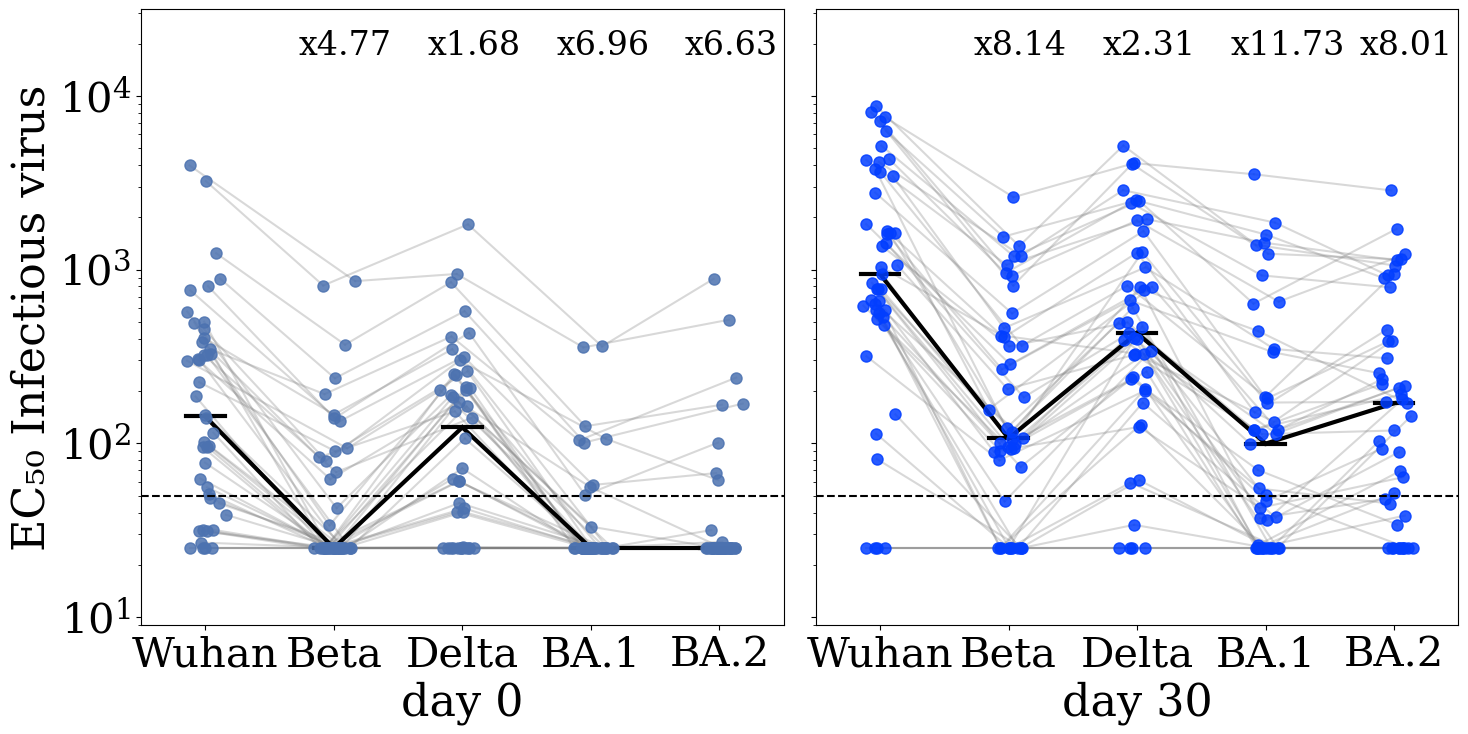

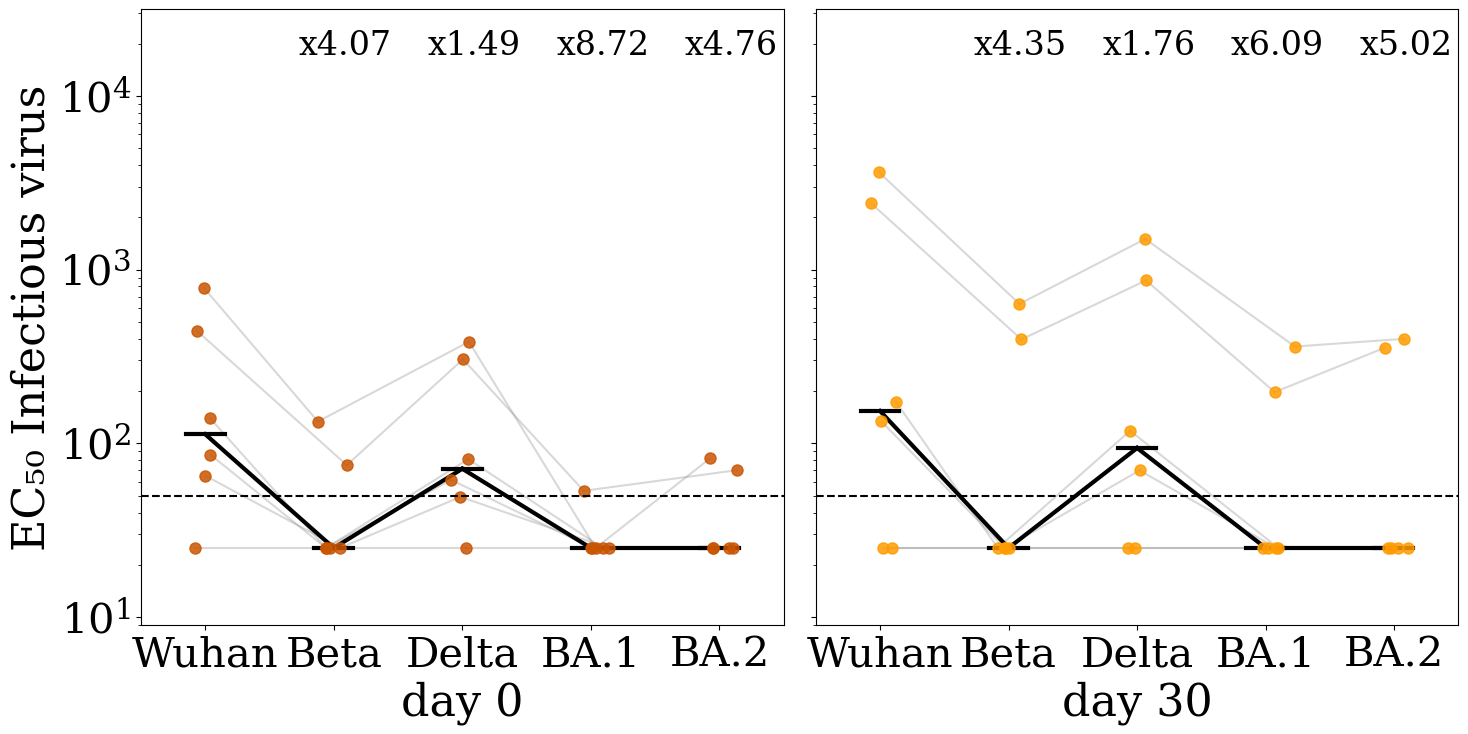

In [25]:
sns.set_context(style_dict["graph"])
for vac_status, colors in zip(['yes','no'], [['#4c72b0', '#023eff'], ['#c95603','#ff9c00']]):
    f,ax = plt.subplots(1,2, figsize=(17,8), sharey=True)
    f.subplots_adjust(wspace=0.05, hspace=0)
    ylim=(9,10**4.5)
    for col, time, color in zip([0,1], ['T0', 'T1'], colors):
        curr_cols = data_df.columns[data_df.columns.str.endswith('Infectious-virus neutralization assay')]
        data = data_df[(data_df['time point']==time)&(data_df['infected T1']=='no')&(data_df['vaccinated']==vac_status)][curr_cols].dropna().copy()
        data.loc[:, 'ptid'] = data.index.map(lambda x: x.split('_')[0])
        curr_df = pd.melt(data, id_vars=['ptid'], value_vars=curr_cols)
        curr_df.loc[:, 'variant'] = curr_df.loc[:, 'variable'].map(lambda x: x.split(' ')[0])
        order = curr_cols.str.replace(' Infectious-virus neutralization assay','')
        cutils.pair_boxplot(data=curr_df, y=['value'], x='variant',
                            order=order.tolist(), 
                            ptid_recognition='ptid', figsize=(10,8), jitter_scale=0.07, c_plaette=color, alpha=0.85, ax=ax[col],
                             line_color='gray', pair_line_style='-', pair_line_width=1.5, pair_line_alpha=0.3, 
                            backbone='median', median_color='black', median_width=3)
        drop_fold_dict = {}

        wuhan = curr_df[curr_df.variant == 'Wuhan']['value'].values
        for var in order[1:]:
            d_f = wuhan / curr_df[curr_df.variant == var]['value'].values
            drop_fold_dict[var] = d_f.mean()

        for i_ in range(len(order)-1):
            yp_0 = curr_df[curr_df.variant==order[i_]]['value'].median()
            yp_1 = curr_df[curr_df.variant==order[i_+1]]['value'].median()
            xp_0 = i_
            xp_1 = i_+1
            ax[col].plot([xp_0, xp_1], [yp_0, yp_1], color='k',linewidth=3, linestyle='-', zorder=1, alpha=1)
            ax[col].text(i_+1-0.27 , ylim[1]*0.55,'x{0:.2f}'.format(drop_fold_dict[order[i_+1]]), fontsize=24)

        ax[col].set_xlabel('')
        ax[col].set_xticklabels(order, fontsize=30)
        ax[col].set_ylabel('')
        ax[col].hlines(50, -0.5, len(order)-0.5, colors='black', linestyles='--')
        ax[col].set_ylim(ylim)

    ax[0].set_yscale('log')
    ax[0].set_ylabel('EC'+u'\u2085' + u'\u2080 Infectious virus', fontsize=32)
    ax[0].set_xlabel('day 0', fontsize=32)
    ax[1].set_xlabel('day 30', fontsize=32)
    plt.setp(ax[0].get_yticklabels(), fontsize=30)
    plt.show()
    plt.close()

### Fig.1e

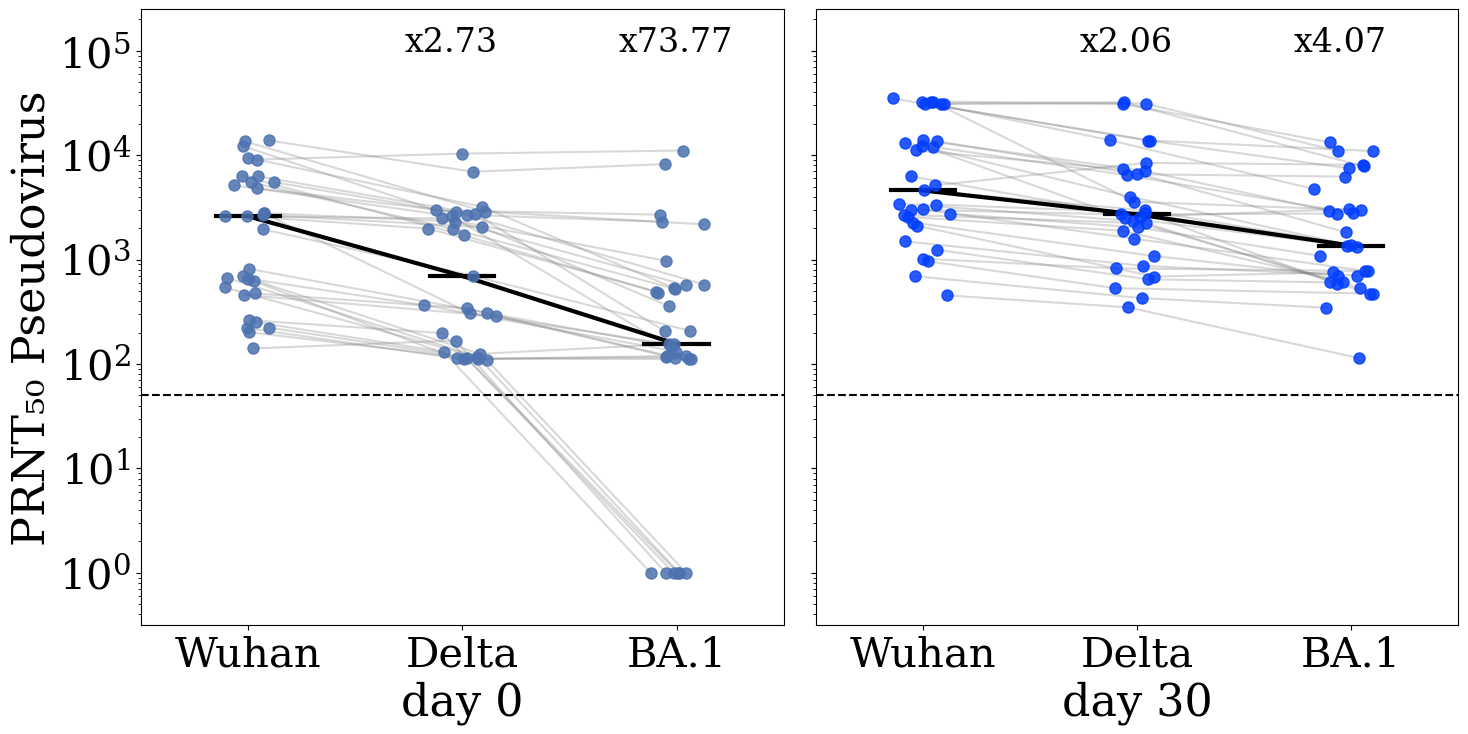

In [26]:
sns.set_context(style_dict["graph"])
f,ax = plt.subplots(1,2, figsize=(17,8), sharey=True)
f.subplots_adjust(wspace=0.05, hspace=0)
ylim=(10**-0.5,10**5.4)
for col, time, color in zip([0,1], ['T0', 'T1'], ['#4c72b0', '#023eff']):
    curr_cols = data_df.columns[data_df.columns.str.endswith('Pseudovirus neutralization assay')]
    data = data_df[(data_df['time point']==time)&(data_df['infected T1']=='no')&(data_df['vaccinated']=='yes')][curr_cols].dropna().copy()
    data.loc[:, 'ptid'] = data.index.map(lambda x: x.split('_')[0])
    curr_df = pd.melt(data, id_vars=['ptid'], value_vars=curr_cols)
    curr_df.loc[:, 'variant'] = curr_df.loc[:, 'variable'].map(lambda x: x.split(' ')[0])
    order = curr_cols.str.replace(' Pseudovirus neutralization assay','')
    # len_dict[time] = len(data)
    # dot_colors = colormap_dict['{0}_{1}'.format(time, 'yes')]
    cutils.pair_boxplot(data=curr_df, y=['value'], x='variant',
                        order=order.tolist(), 
                        ptid_recognition='ptid', figsize=(10,8), jitter_scale=0.07, c_plaette=color, alpha=0.85, ax=ax[col],
                         line_color='gray', pair_line_style='-', pair_line_width=1.5, pair_line_alpha=0.3, 
                        backbone='median', median_color='black', median_width=3)
    drop_fold_dict = {}
    
    wuhan = curr_df[curr_df.variant == 'Wuhan']['value'].values
    for var in order[1:]:
        d_f = wuhan / curr_df[curr_df.variant == var]['value'].values
        drop_fold_dict[var] = d_f.mean()

    for i_ in range(len(order)-1):
        yp_0 = curr_df[curr_df.variant==order[i_]]['value'].median()
        yp_1 = curr_df[curr_df.variant==order[i_+1]]['value'].median()
        xp_0 = i_
        xp_1 = i_+1
        ax[col].plot([xp_0, xp_1], [yp_0, yp_1], color='k',linewidth=3, linestyle='-', zorder=1, alpha=1)
        ax[col].text(i_+1-0.27 ,ylim[1]*0.4,'x{0:.2f}'.format(drop_fold_dict[order[i_+1]]), fontsize=24)

    ax[col].set_xlabel('')
    ax[col].set_xticklabels(order, fontsize=30)
    ax[col].set_ylabel('')
    ax[col].hlines(50, -0.5, len(order)-0.5, colors='black', linestyles='--')
    ax[col].set_ylim(ylim)

ax[0].set_yscale('log')
ax[0].set_ylabel('PRNT'+u'\u2085' + u'\u2080 Pseudovirus', fontsize=32)
ax[0].set_xlabel('day 0', fontsize=32)
ax[1].set_xlabel('day 30', fontsize=32)
plt.setp(ax[0].get_yticklabels(), fontsize=30)
plt.show()
plt.close()

## Fig.2

### Fig.2a

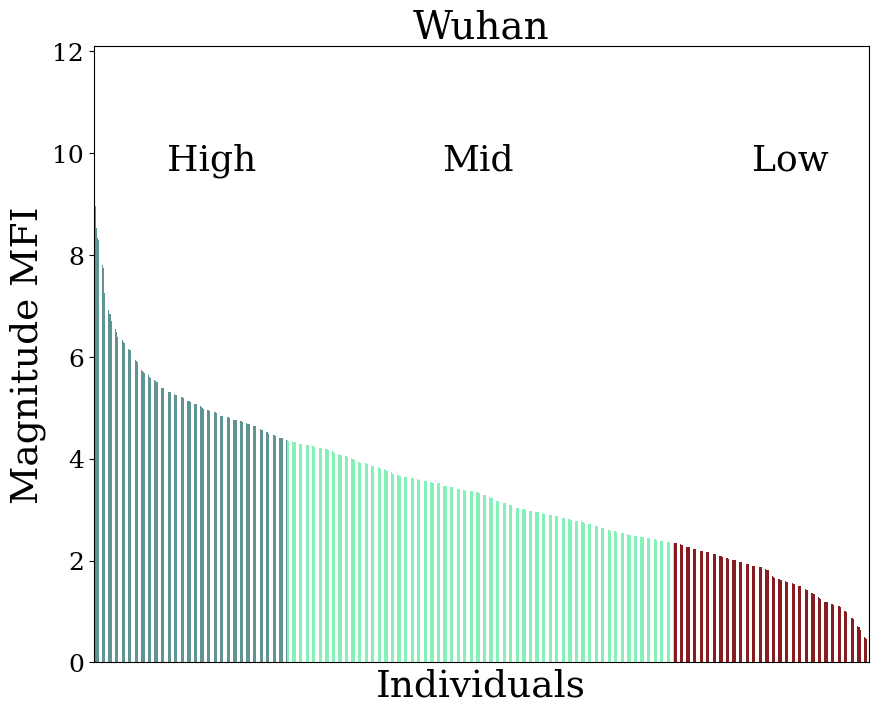

In [27]:
sns.set_context(style_dict["graph"])
odds, p, curr_df, infection_stats = low_high_infection_summary_stats_T1[(('IgA', 'vaccinated', 'Antigen Microarray SARS Cov 2 magnitude IgA'))]
f, ax = cutils.plot_sorted_percentile(df=data_df, column='Antigen Microarray SARS Cov 2 magnitude IgA', figsize=(10,8), colors=['#609492','#85F1B9', '#861D20'])
ax.set_title('Wuhan' , fontsize=28)
ax.set_xlabel('Individuals', fontsize=27)
ax.set_ylabel('Magnitude MFI', fontsize=27)
ax.text(0.095, 0.8, 'High', fontsize=26,transform=ax.transAxes)
ax.text(0.45, 0.8,  'Mid', fontsize=26,transform=ax.transAxes)
ax.text(0.85, 0.8, 'Low', fontsize=26,transform=ax.transAxes)
plt.tick_params(axis='x', which='both',  bottom=False, top=False, labelbottom=False)

### Fig.2b

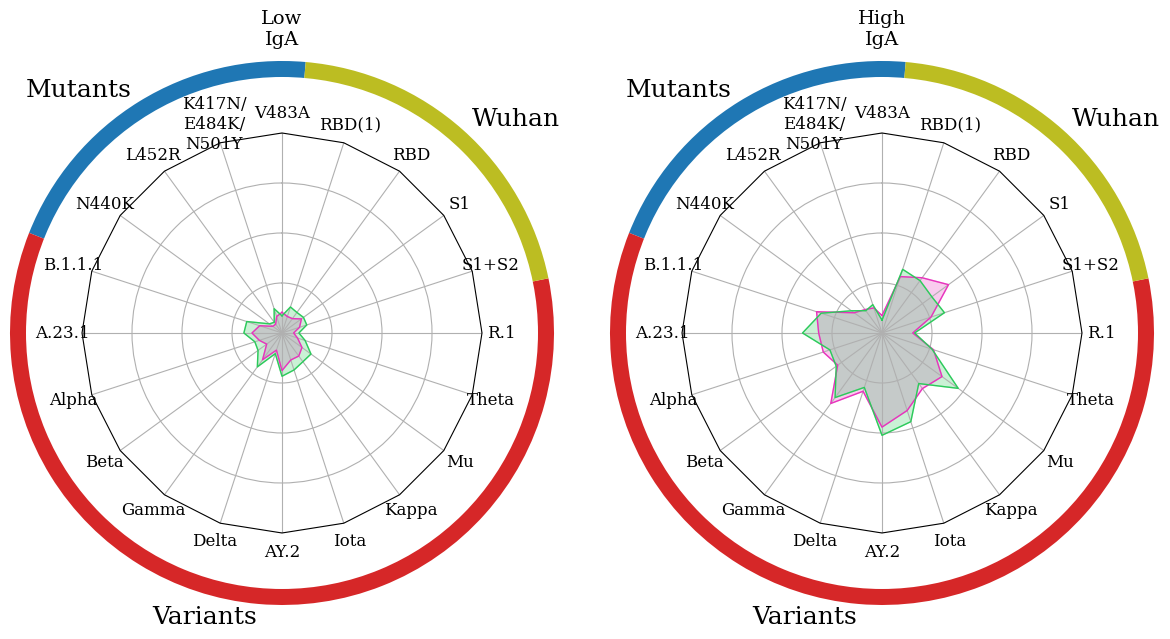

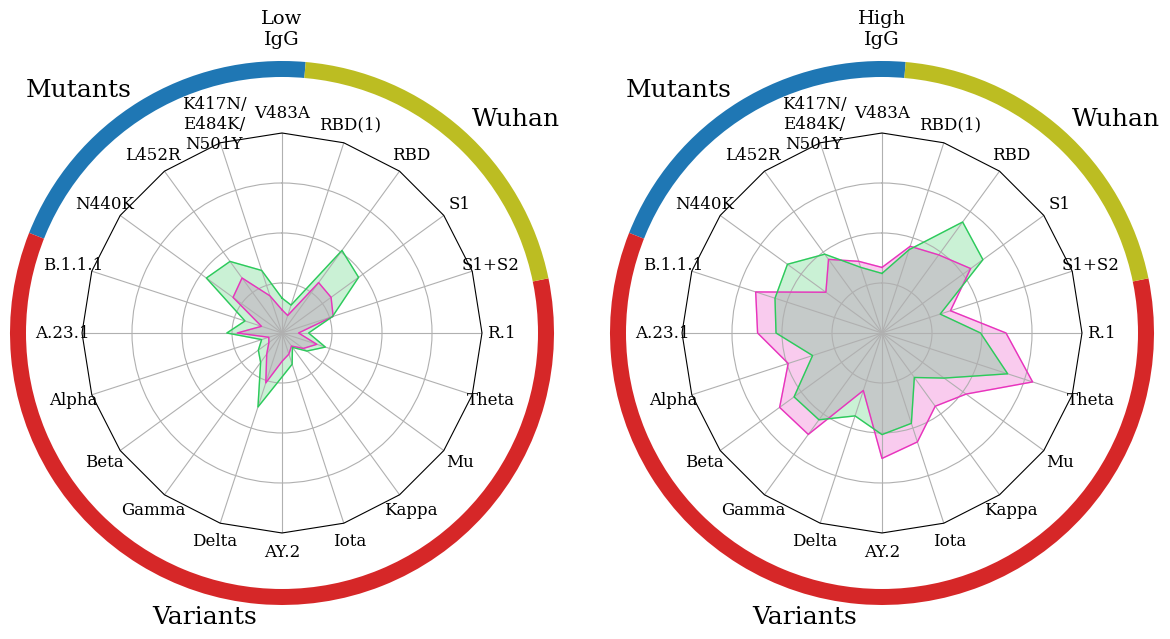

In [28]:
sns.set_context(style_dict["spider"])
all_timepoints = ['T0', 'T1']
for vac in ['vaccinated-uninfected_T1']:
    for isotype in ['IgA', 'IgG']:
        sort_by = 'Wuhan_magnitude'
        f, ax = plt.subplots(1, 2, subplot_kw=dict(projection='radar'), figsize=(10,5))
        f.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.95, wspace=0.5)


        for spider_group,curr_ax in zip(['low', 'high'], ax.flatten()):
            curr_columns = spider_n_df.columns
            t0_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T0']), curr_columns]
            t1_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T1']), curr_columns]
            curr_data = np.array([t0_data.values.tolist(), t1_data.values.tolist()])

            cutils.plot_spiderplot_specific_colors(data = curr_data, curr_timepoints = all_timepoints, 
                                        all_timepoints = all_timepoints, 
                                        spoke_labels=spoke_labels.tolist(), title=None, 
                                        donut_sizes= [4.2, 12.2, 4.2],  #  or antigen_sizes
                                        start_angle=85, 
                            donut_labels=antigen_labels, donut_colors=donut_colors_v1,
                            max_value=1, figsize=(6,6), chart_radius=1.7, title_height = 1.27, diff_circles=0.1,
                            ptid_colors_dict = timepoint_colors_dict2, ax_handle=curr_ax, donut_labels_textprop={'size':18})
        ax[0].set_title('Low' + '\n' + isotype, x=0.5, y=1.2)
        ax[1].set_title('High' + '\n' + isotype, x=0.5, y=1.2)

### Fig.2c

### load subset cohort BIH group data

In [29]:
binding_group_df = pd.read_excel('Supplementary Data 3.xlsx', index_col=0)

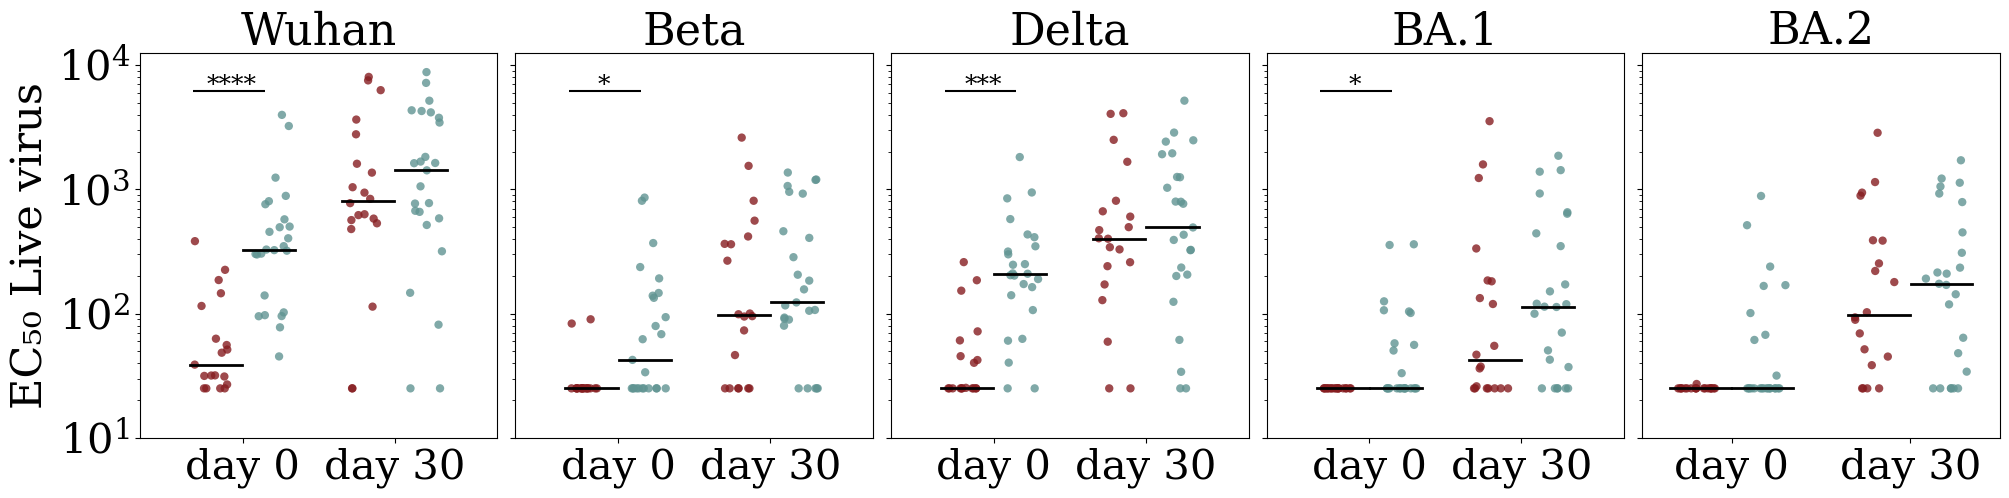

In [30]:
sns.set_context(style_dict["graph"])
stats_dict = {0.05:'*', 0.001:'**', 0.0001:'***', 0.00001:'****'}
f,ax = plt.subplots(1,5, figsize=(24,5), sharey=True)
f.subplots_adjust(wspace=0.05, hspace=0)
curr_cols = data_df.columns[data_df.columns.str.endswith('Infectious-virus neutralization assay')]
curr_df = data_df[curr_cols.append(pd.Index(['vaccinated','time point', 'infected T1']))].dropna().copy()
curr_df = curr_df.join(binding_group_df)
for var, col in zip(curr_cols, [0,1,2,3,4]):
     
    sns.stripplot(data=curr_df[(curr_df['vaccinated']=='yes')&(curr_df['infected T1']=='no')], x='time point', y=var, order=['T0', 'T1'], ax=ax[col],
                 hue='group', hue_order=['low', 'high'], dodge=True, palette=['#861D20', '#609492'], size=6, jitter=0.23, alpha=0.8)
    
    #             plot the median line
    sns.boxplot(showmeans=False,
                medianprops={'visible': True, 'color': 'k', 'ls': '-', 'lw': 2 },
                whiskerprops={'visible': False},
                zorder=10,
                data=curr_df[(curr_df['vaccinated']=='yes')&(curr_df['infected T1']=='no')], x='time point', y=curr_df[var], order=['T0', 'T1'], dodge=True, ax=ax[col], width=0.7,
                hue='group', hue_order=['low', 'high'], showfliers=False,
                showbox=False,
                showcaps=False)
    for time, x_pos in zip(['T0', 'T1'], [0, 0.5]):
        curr_data = curr_df[(curr_df['vaccinated']=='yes')&(curr_df['infected T1']=='no')&(curr_df['time point']==time)]
        st, pval = scipy.stats.ranksums(curr_data[curr_data.group == 'low'][var], curr_data[curr_data.group == 'high'][var])
        for p, s_pos in zip([0.00001, 0.0001, 0.001, 0.05], [0.188,0.206,0.214,0.23]):
            if pval < p:
                ax[col].text(x_pos+s_pos, 0.9, stats_dict[p], fontsize=18,transform=ax[col].transAxes)
                ax[col].hlines(0.9, x_pos+0.15, x_pos+0.35, colors='black', linestyles='-',transform=ax[col].transAxes)
                break
        
    ax[col].set_ylabel('', fontsize=18)
    ax[col].set_yscale('log')
    ax[col].set_title(var.split(' ')[0], fontsize=32)
    ax[0].set_ylabel('EC'+u'\u2085'+u'\u2080' + ' Live virus', fontsize=31)
    ax[col].set_xlabel('')
    ax[col].set_xticklabels(['day 0', 'day 30'], fontsize=30)
    ax[col].set_ylim(10, 10**4.1)
    ax[col].get_legend().remove()
plt.setp(ax[0].get_yticklabels(), fontsize=30)
plt.show()
plt.close()

### Fig.2d

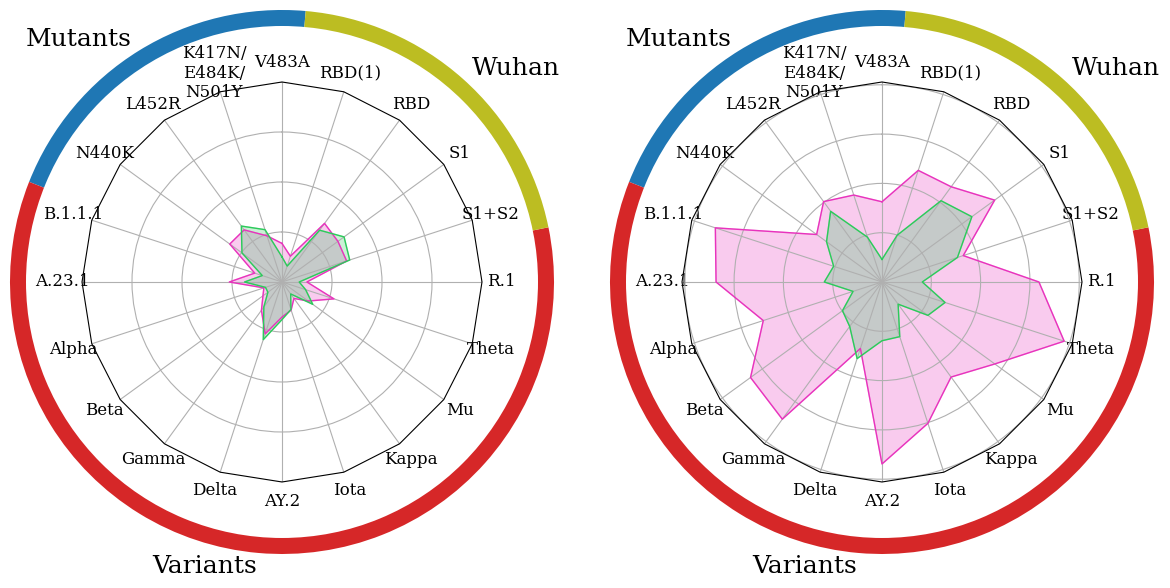

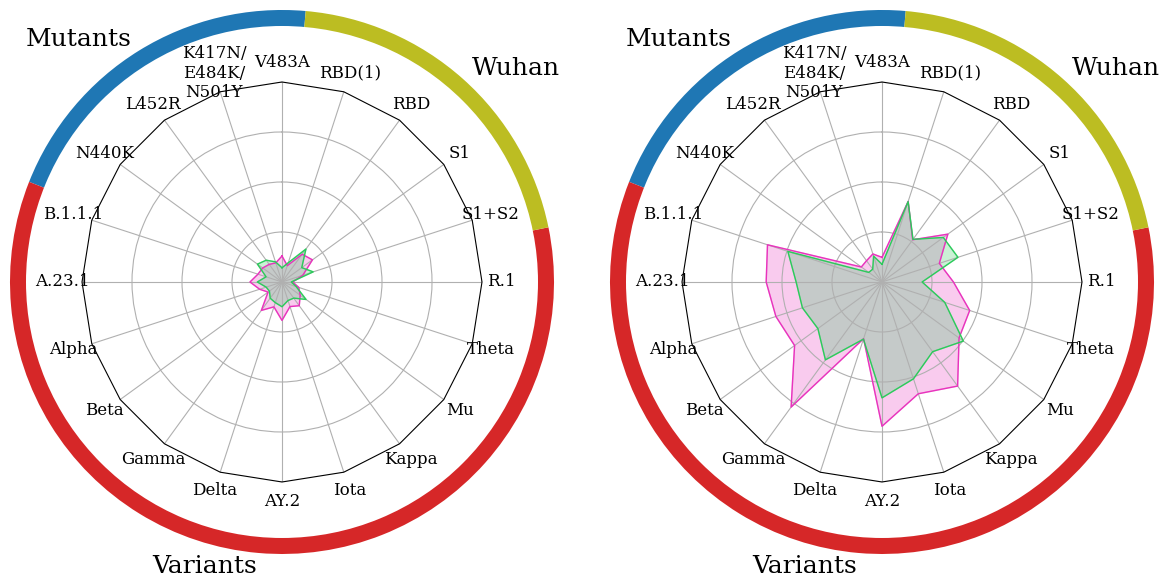

In [31]:
sns.set_context(style_dict["spider"])
all_timepoints = ['T0', 'T1']
for vac in ['unvaccinated-uninfected_T1']:
    for isotype in ['IgG', 'IgA']:
        sort_by = 'Variants_magnitude'
        f, ax = plt.subplots(1, 2, subplot_kw=dict(projection='radar'), figsize=(10,5))
        f.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.95, wspace=0.5)

      
        for spider_group,curr_ax in zip(['low', 'high'], ax.flatten()):
            curr_columns = spider_n_df.columns
            t0_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T0']), curr_columns]
            t1_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T1']), curr_columns]
            curr_data = np.array([t0_data.values.tolist(), t1_data.values.tolist()])

            cutils.plot_spiderplot_specific_colors(data = curr_data, curr_timepoints = all_timepoints, 
                                        all_timepoints = all_timepoints, 
                                        spoke_labels=spoke_labels.tolist(), title=None, 
                                        donut_sizes= [4.2, 12.2, 4.2],  #  or antigen_sizes
                                        start_angle=85, 
                            donut_labels=antigen_labels, donut_colors=donut_colors_v1,
                            max_value=0.8, figsize=(6,6), chart_radius=1.7, title_height = 1.27, diff_circles=0.1,
                            ptid_colors_dict = timepoint_colors_dict2, ax_handle=curr_ax, donut_labels_textprop={'size':18})

## Fig.3

### Fig.3a left

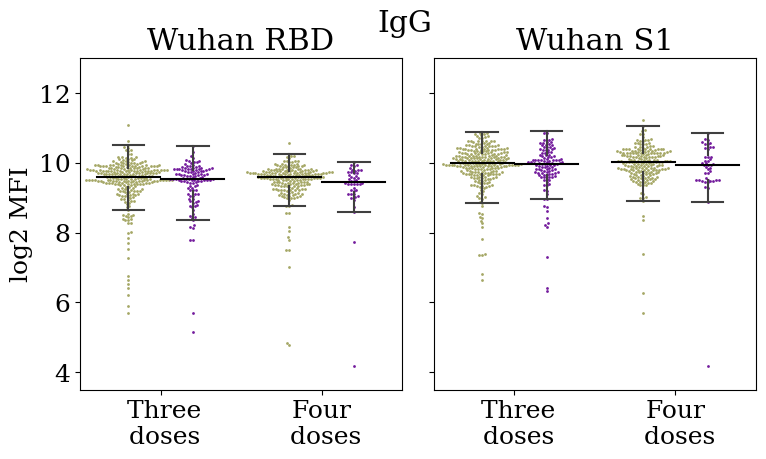

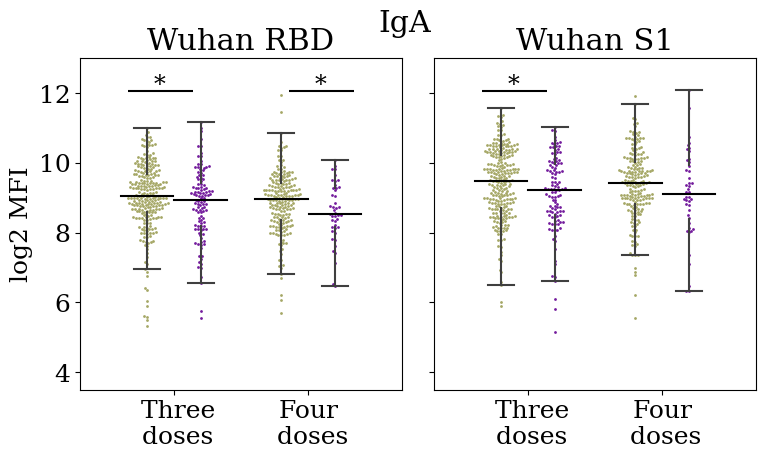

In [32]:
sns.set_context(style_dict["graph"])
#set colors
gr = ['#A5A765', '#A5A765', '#A5A765']# Set your custom color palette
pr = ['#731B9C', '#731B9C', '#731B9C']
GrPalette = sns.color_palette(gr)
PrPalette = sns.color_palette(pr)

curr_antigens = pd.Index(['Antigen Microarray SARS-COV-2 RBD AUC normalized', 'Antigen Microarray SARS-COV-2 S1 AUC normalized'])
for isotype in ['IgG', 'IgA']:
    antigen_names = dict(zip(curr_antigens + ' ' + isotype, ['Wuhan RBD', 'Wuhan S1']))
    f,ax = cutils.plot_antigen_boxplots_by_infection_stat(df=data_df[data_df['time point']=='T0'].copy(), antigens= curr_antigens + ' ' + isotype, hue='infected T1' , 
                                                   antigen_names=antigen_names, group_column='vaccinated', group_order=['no', 'yes'], hue_order=['no', 'yes'], 
                                                   time_column='time point', timepoint='T0', y_scale='log2', sharey=True, figsize=(8,5.3), dot_size=2, annot=True,
                                                   showfliers=True, title=isotype, x_label='', savepath=None, width=0.9,       
                                                   colormap=[GrPalette, PrPalette], legend=False)
    ax[0].set_ylim(3.5,13)
    ax[0].set_ylabel('log2 MFI')

### Fig.3a right

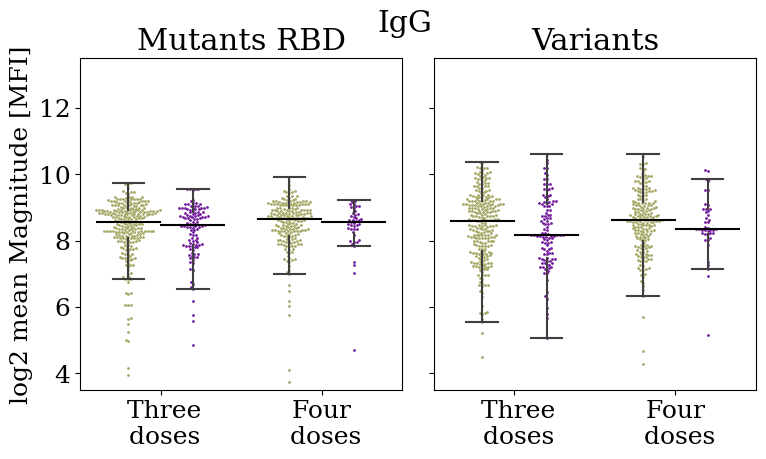

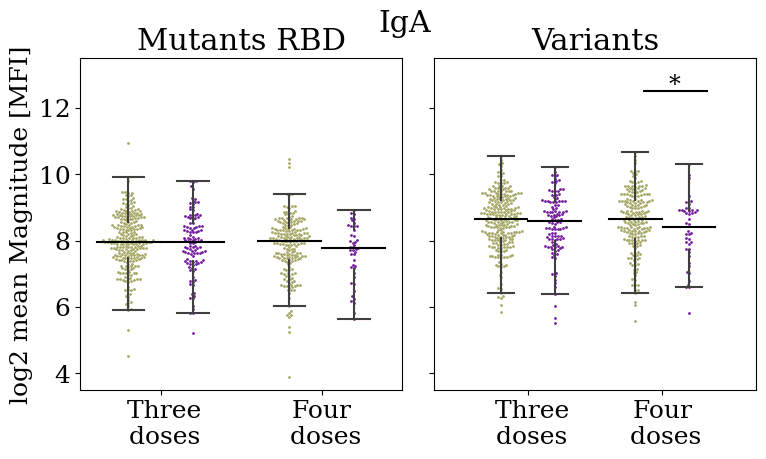

In [33]:
sns.set_context(style_dict["graph"])
#set colors
gr = ['#A5A765', '#A5A765', '#A5A765']# Set your custom color palette
pr = ['#731B9C', '#731B9C', '#731B9C']
GrPalette = sns.color_palette(gr)
PrPalette = sns.color_palette(pr)

curr_antigens = pd.Index(['Antigen Microarray RBD Mutants magnitude', 'Antigen Microarray Variants magnitude'])
curr_df = data_df[data_df['time point']=='T0'].copy()
for isotype in ['IgG', 'IgA']:
    antigen_names = dict(zip(curr_antigens + ' ' + isotype, ['Mutants RBD', 'Variants']))
    for a in curr_antigens + ' ' + isotype:
        curr_df.loc[:, a] = curr_df.loc[:, a] / strain_dict[antigen_names[a].replace('Mutants RBD', 'RBD_Mutants')].shape[0]
    f,ax = cutils.plot_antigen_boxplots_by_infection_stat(df=curr_df, antigens= curr_antigens + ' ' + isotype, hue='infected T1' , 
                                                   antigen_names=antigen_names, group_column='vaccinated', group_order=['no', 'yes'], hue_order=['no', 'yes'], 
                                                   time_column='time point', timepoint='T0', y_scale='log2', sharey=True, figsize=(8,5.3), dot_size=2, annot=True,
                                                   showfliers=True, title=isotype, x_label='', savepath=None, width=0.9,       
                                                   colormap=[GrPalette, PrPalette], legend=False)
    ax[0].set_ylim(3.5,13.5)
    ax[0].set_ylabel('log2 mean Magnitude [MFI]')

### Fig.3b

In [34]:
low_high_Figure_3B = {}
curr_columns = pd.Index(['Antigen Microarray Variants magnitude IgA', 'Antigen Microarray SARS Cov 2 magnitude IgA', 'result 1 SARS-COV-2 S2 IgG BioPlex'])
df = data_df[data_df['time point']=='T0'][curr_columns.append(pd.Index(['time point', 'infected T1', 'vaccinated']))].copy()
df.loc[:, 'isotype'] = 'IgA'
for vaccinated, vac_str in zip(['yes', 'no'], ['vaccinated', 'unvaccinated']):
    for a in curr_columns:
        odds, p, curr_df, infection_stats = cutils.compute_response_groups_by_antigen(df=df, antigen=a, isotype='IgA', time_column='time point',
                                                                                vaccinated=vaccinated, infected_col='infected T1', 
                                                                                quantiles=[0.25, 0.75], print_flag=False)
        low_high_Figure_3B[('IgA', vac_str, a)] = (odds, p, curr_df, infection_stats)

In [35]:
vaccinated_hr_cox = pd.read_excel('Supplementary Table 5.xlsx', index_col=0, sheet_name='Four doses')
unvaccinated_hr_cox = pd.read_excel('Supplementary Table 5.xlsx', index_col=0, sheet_name='Three doses')

Text(0, 0.5, '   Four doses  \n Infection Rate')

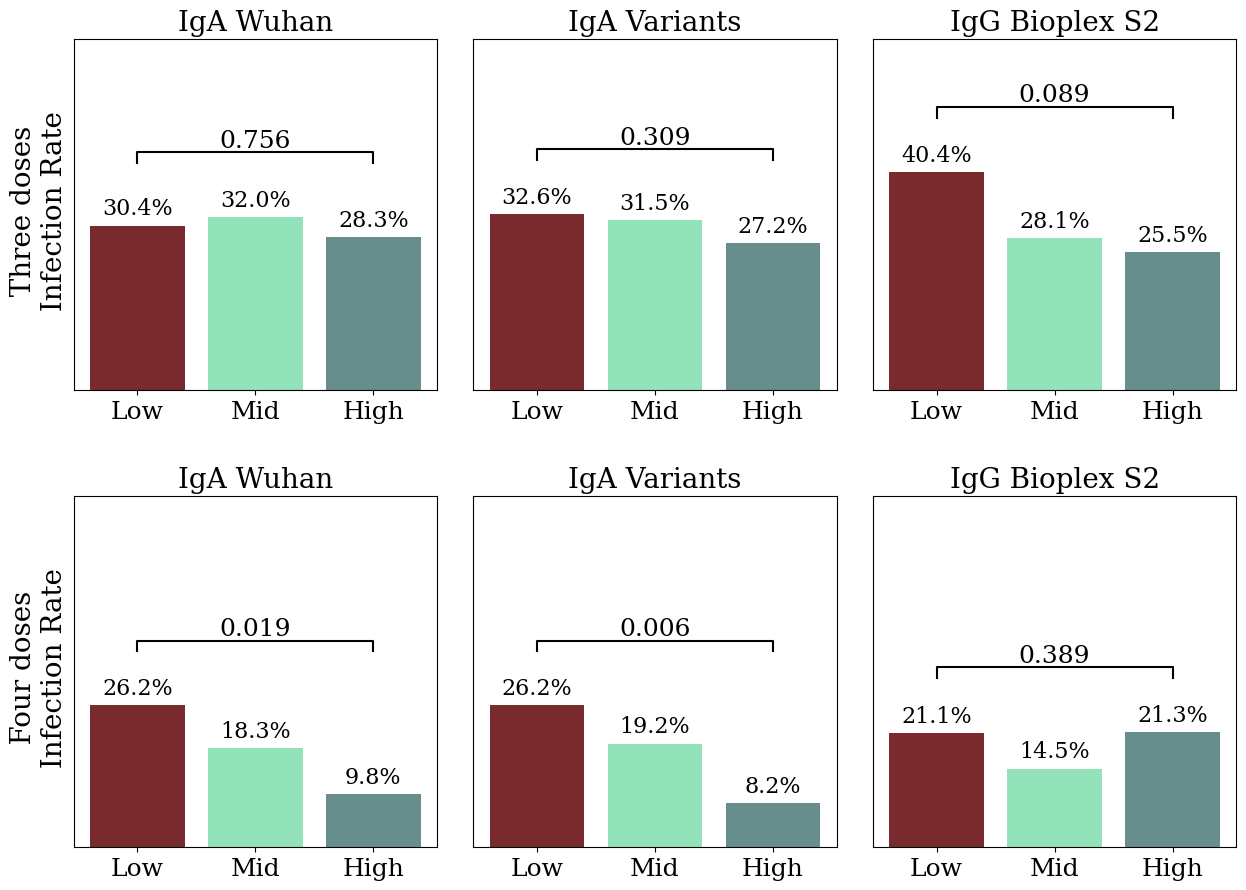

In [36]:
sns.set_context(style_dict["graph"])
curr_palette = sns.color_palette(['#609492','#85F1B9', '#861D20'][::-1])
curr_columns = pd.Index(['Antigen Microarray SARS Cov 2 magnitude IgA', 'Antigen Microarray Variants magnitude IgA', 'result 1 SARS-COV-2 S2 IgG BioPlex'])
f, ax = plt.subplots(2,3, figsize=(15, 10.5), sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.3)
for curr_antigen, curr_a_name, pval_idx, col in zip(curr_columns, ['IgA Wuhan', 'IgA Variants', 'IgG Bioplex S2'], 
                                                    ['IgA Wuhan', 'IgA Variants', 'IgG BioPlex S2'], [0,1,2]):
    for vaccinated, vac_str, dose_group, hr_df,row in zip(['no', 'yes'], ['unvaccinated', 'vaccinated'] ,['Three doses', 'Four doses'],[unvaccinated_hr_cox, vaccinated_hr_cox], [0,1]):
        odss, p, curr_df, infection_stats = low_high_Figure_3B[('IgA', vac_str, curr_antigen)]

        sns.barplot(x=[1, 2, 3], y=list(infection_stats.values()),palette=curr_palette, ax=ax[row][col])
        ax[row][col].set_xticklabels(['Low', 'Mid', 'High'], fontsize=18)
        ax[row][col].set_ylim([0, 65])
        cutils.show_values_on_bars(ax[row][col])
        ax[row][col].set_title(curr_a_name, fontsize=20)

        x1, x2 = (0, 2) # comparing high to low
        y, h, c = max(list(infection_stats.values())) + 10, 2, 'k'
        ax[row][col].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=c)
        p_str = '{0:.3f}'.format(hr_df.loc[pval_idx,'p-value']) #if p < 0.05 else "ns"
        ax[row][col].text((x1+x2)*.5, y+h, p_str , ha='center', va='bottom', color=c, size=18)
        ax[row][col].tick_params(left=False)
plt.yticks([])
ax[0][0].set_ylabel('  Three doses \n Infection Rate', size=20)
ax[1][0].set_ylabel('   Four doses  \n Infection Rate', size=20)

## Fig.6

### Fig.6 a

In [37]:
valid_c_df_all = pd.read_excel('Supplementary Data 8.xlsx', index_col=0, sheet_name='data_up_to_june')
model_values_df_all = pd.read_excel('Supplementary Table 15.xlsx', index_col=0)

In [38]:
str_dict = {'SARS_Cov_2_gmean_magnitude_IgG':'IgG Wuhan', 'SARS_Cov_2_gmean_magnitude_IgA':'IgA Wuhan', 
            'Variants_gmean_magnitude_IgG':'IgG Variants', 'Variants_gmean_magnitude_IgA':'IgA Variants'}

In [39]:
low_high_bars = {}
curr_columns = str_dict.keys()
for a in curr_columns:
    oddsratio, p_value, curr_df, infection_rates =cutils.compute_response_groups_by_antigen_ind(df=valid_c_df_all, antigen=a, infected_col='infected', 
                                                    quantiles=[0.25, 0.75], print_flag=False, p_threshold=1)
    low_high_bars[str_dict[a]] = ( oddsratio, p_value, curr_df, infection_rates)

In [40]:
idx_dict = {}
naive_comb_dict = {}
for col_1, col_2 in zip(['SARS_Cov_2_gmean_magnitude_response_group_IgG', 
                         'SARS_Cov_2_gmean_magnitude_response_group_IgG', 
                         'Variants_gmean_magnitude_response_group_IgG', 
                         'Variants_gmean_magnitude_response_group_IgG'],
                        ['Variants_gmean_magnitude_response_group_IgA', 
                         'SARS_Cov_2_gmean_magnitude_response_group_IgA', 
                         'Variants_gmean_magnitude_response_group_IgA',
                        'SARS_Cov_2_gmean_magnitude_response_group_IgA']):
    curr_comb_str = str_dict[col_1.replace('_response_group', '')]+' and '+str_dict[col_2.replace('_response_group', '')]
    temp_df = pd.DataFrame(index=valid_c_df_all.index)
    for status in ['low', 'high', 'mid']:
        if status != 'mid':
            curr_idx = valid_c_df_all[valid_c_df_all[col_1] == status].index.intersection\
            (valid_c_df_all[valid_c_df_all[col_2] == status].index)
        else:
            curr_idx = valid_c_df_all.index.drop(idx_dict['low'].append(idx_dict['high']))
        curr_df = valid_c_df_all.loc[curr_idx]
        idx_dict[status] = curr_idx
        infected_percent = len(curr_df[curr_df['infected']=='yes']) / len(curr_df)*100
#         print(f'{status}: {infected_percent}%')
        naive_comb_dict[status] = infected_percent
        
        temp_df.loc[curr_idx, curr_comb_str] = status
    low_v, high_v, mid_v = naive_comb_dict.values()
    low_high_bars[curr_comb_str] = (model_values_df_all.loc[curr_comb_str, 'Hazard Ratio'],
                                    model_values_df_all.loc[curr_comb_str, 'p-value'],
                                    temp_df,
                                    {'low':low_v, 'mid':mid_v, 'high':high_v})

In [41]:
marker_list = ['IgA Variants', 'IgA Wuhan', 'IgG Variants', 'IgG Wuhan',
             'IgG Variants and IgA Variants', 'IgG Wuhan and IgA Wuhan',
             'IgG Wuhan and IgA Variants', 'IgG Variants and IgA Wuhan']

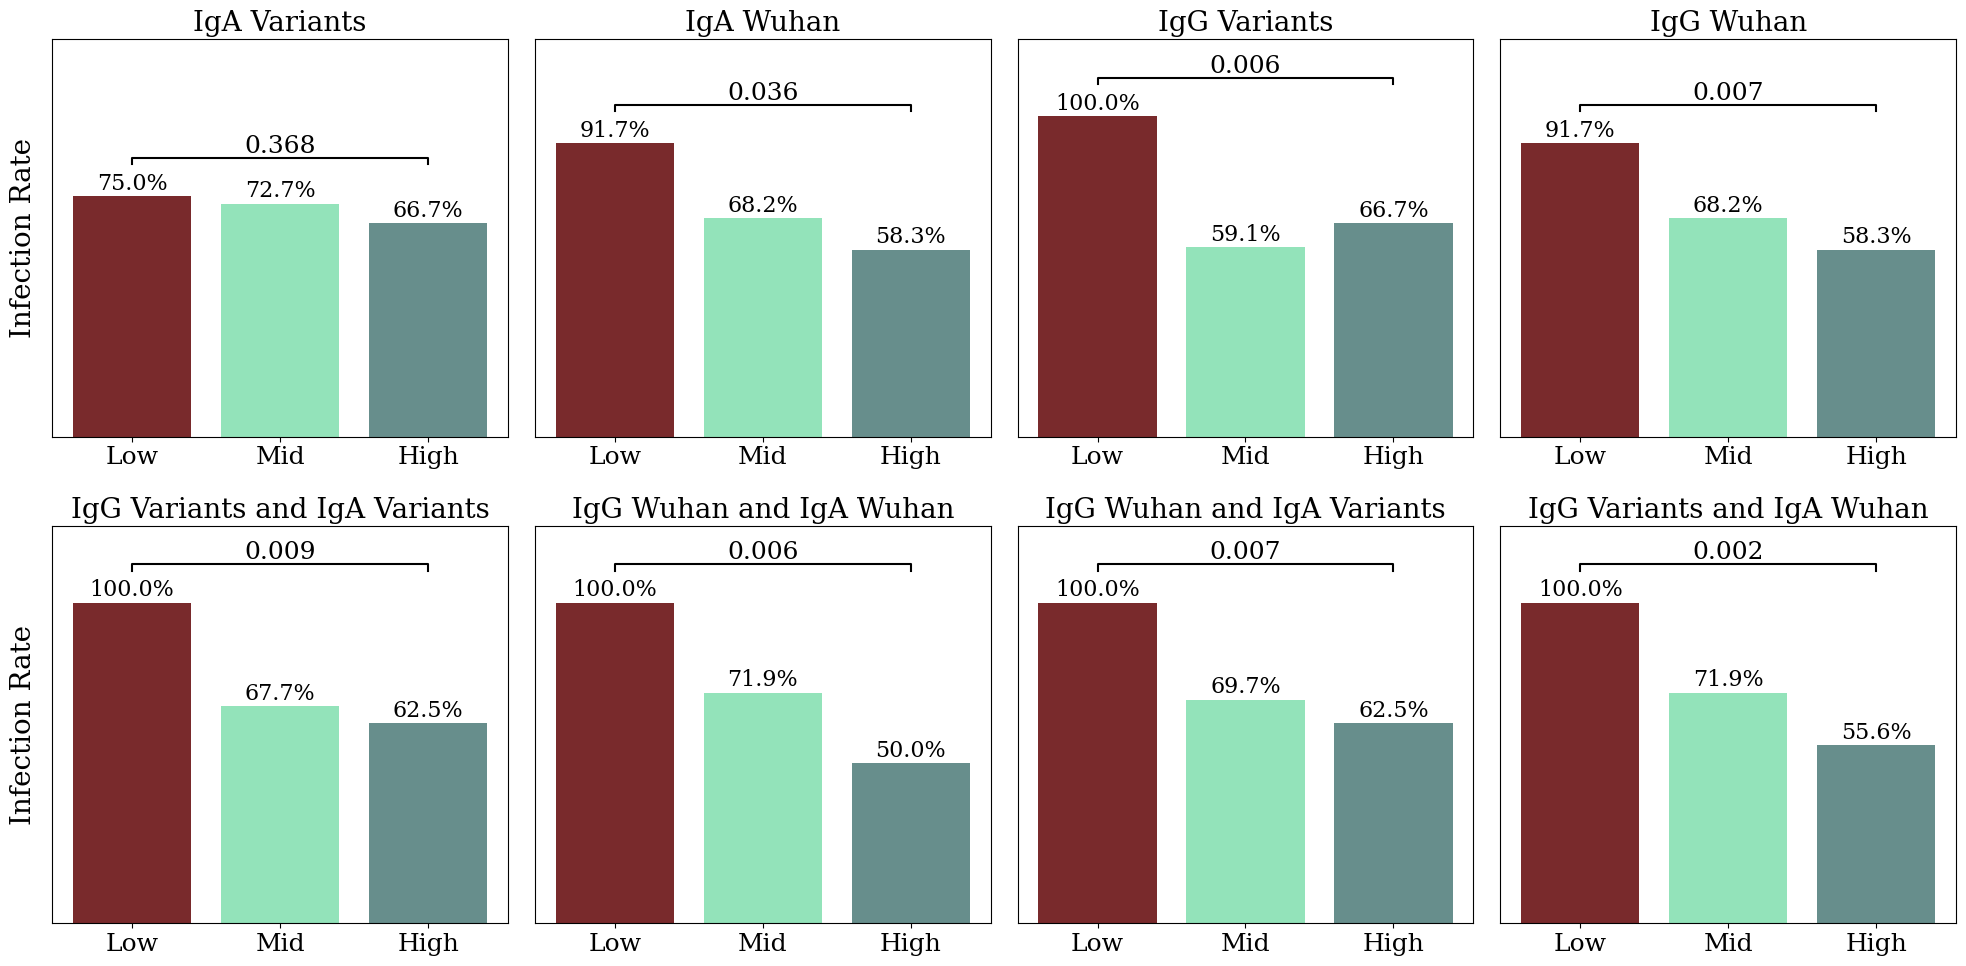

In [42]:
curr_palette = sns.color_palette(['#609492','#85F1B9', '#861D20'][::-1])
f, axes = plt.subplots(2,4, figsize=(20,10), sharey=True)
for marker, ax in zip(marker_list, axes.flatten()):
    odss, p, curr_df, infection_stats = low_high_bars[(marker)]
    sns.barplot(x=[1, 2, 3], y=list(infection_stats.values()),palette=curr_palette, ax=ax)
    ax.set_xticklabels(['Low', 'Mid', 'High'], fontsize=18)
    ax.set_yticklabels('')
    cutils.show_values_on_bars(ax)
    ax.set_title(marker, fontsize=20)
    ax.set_ylabel('')
    x1, x2 = (0, 2) # comparing high to low
    y, h, c = max(list(infection_stats.values())) + 10, 2, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=c)
    p_str = str(model_values_df_all.loc[marker, 'p-value'])
    ax.text((x1+x2)*.5, y+h, p_str , ha='center', va='bottom', color=c, size=18)
    ax.tick_params(left=False)
    ax.set_ylim(0,124)
axes[0][0].set_ylabel('Infection Rate', fontsize=20)
axes[1][0].set_ylabel('Infection Rate', fontsize=20)
plt.tight_layout()
plt.show()

## Supplementary Fig.1

### Load controls data

In [43]:
ctrl_df = pd.read_excel('Supplementary Data 2.xlsx', index_col=0)

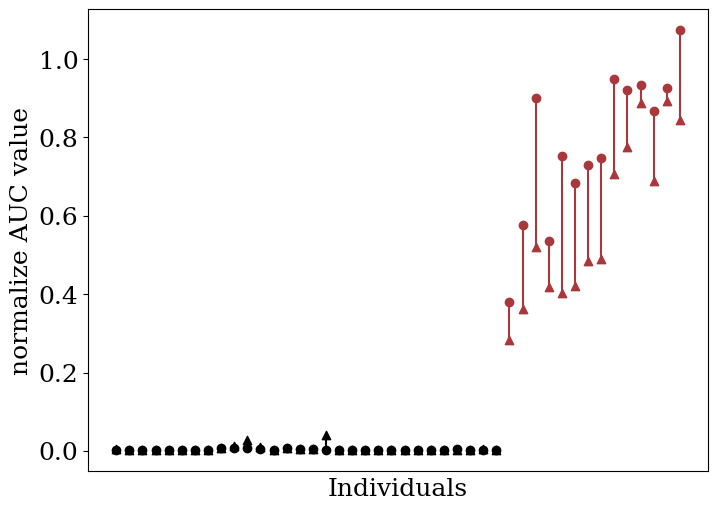

In [44]:
sns.set_context(style_dict["graph"])
f,ax = plt.subplots(1,1, figsize=(8,6))
x = 1
for vac, color in zip(['no', 'yes'], ['black', '#A8383B']):
    curr_idx = ctrl_df[ctrl_df.vaccinated == vac].index
    for i in curr_idx:
        
        plt.scatter(x = x, y = ctrl_df.loc[i, 'SARS_CoV2_S1_AUC_normalized'], c=color)
        plt.scatter(x = x, y = ctrl_df.loc[i, 'SARS_CoV2_RBD(V08H)_AUC_normalized'],c=color, marker = "^")
        y_vals = (ctrl_df.loc[i, 'SARS_CoV2_S1_AUC_normalized'], ctrl_df.loc[i, 'SARS_CoV2_RBD(V08H)_AUC_normalized'])
        plt.vlines(x, np.min(y_vals), np.max(y_vals), color=color)
        x +=1

ax.set_xticklabels('')
ax.set_xticks([])
ax.set_xlabel('Individuals')
ax.set_ylabel('normalize AUC value')
plt.show()

## Supplementary Fig.2

### Supplementary Fig.2a

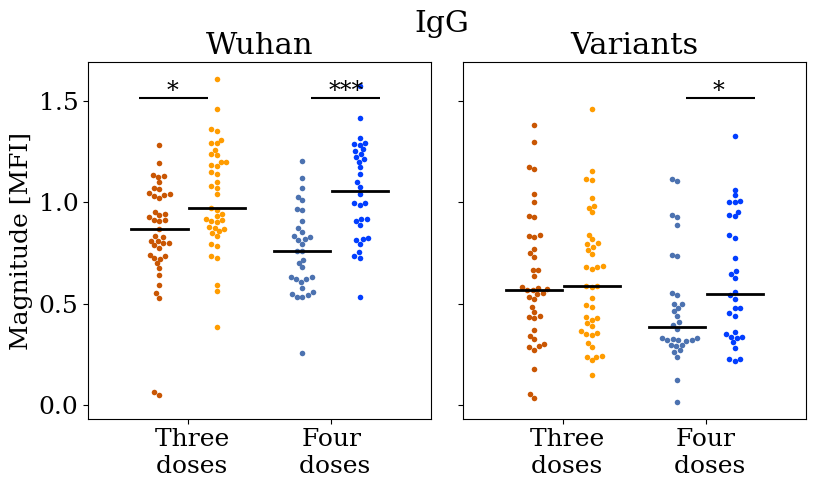

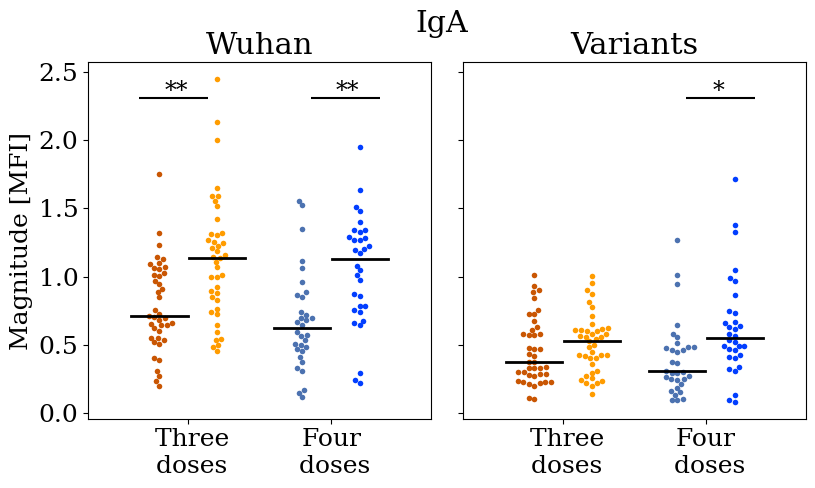

In [45]:
sns.set_context(style_dict["graph"])
curr_idx = data_df[data_df['time point'] == 'T0'].index.map(lambda x: x.split('_')[0]).intersection(data_df[data_df['time point'] == 'T1'].index.map(lambda x: x.split('_')[0]))
t0_t1_idx = (curr_idx + '_BL').append(curr_idx + '_FU1')
curr_strains  = pd.Index([' SARS Cov 2 magnitude ', ' Variants magnitude ']) 

curr_idx = data_df[data_df['time point'] == 'T0'].index.map(lambda x: x.split('_')[0]).intersection(data_df[data_df['time point'] == 'T1'].index.map(lambda x: x.split('_')[0]))
t0_t1_idx = (curr_idx + '_BL').append(curr_idx + '_FU1')
t0_t1_df = data_df.loc[t0_t1_idx]

# plot graphs for un-infected subjects:
for isotype in ['IgG', 'IgA']:
    curr_df = t0_t1_df[t0_t1_df['infected T1'] == 'yes'].copy()
    strain_names = dict(zip('Antigen Microarray' + curr_strains + isotype, pd.Index(['Wuhan', 'Variants'])))
    for a in curr_strains:
        curr_col = 'Antigen Microarray' + a + isotype
        curr_df.loc[:, curr_col] = curr_df.loc[:, curr_col] / strain_dict[a[1:-1].replace(' magnitude', '').replace(' ', '_')].shape[0]
    
    f, ax = cutils.plot_antigen_boxplots_by_timepoints(df=curr_df, antigens='Antigen Microarray' + curr_strains + isotype , antigen_names=strain_names, group_column='vaccinated', 
                                                group_order=['no', 'yes'], hue_order=['T0', 'T1'], time_column='time point', y_scale=None, figsize=(8.5,5),
                                                showfliers=False, title=None, x_label='', sharey=True, annot=True,  legend=False,colormap={'d0_cmap':['#4c72b0','#c95603'], 
                                                                                                                                              'd30_cmap':['#023eff','#ff9c00']},
                                                savepath=None)
    
    ax[0].set_ylabel('Magnitude [MFI]')
    plt.suptitle(isotype, x=0.54, y=0.99)

### Supplementary Fig.2b

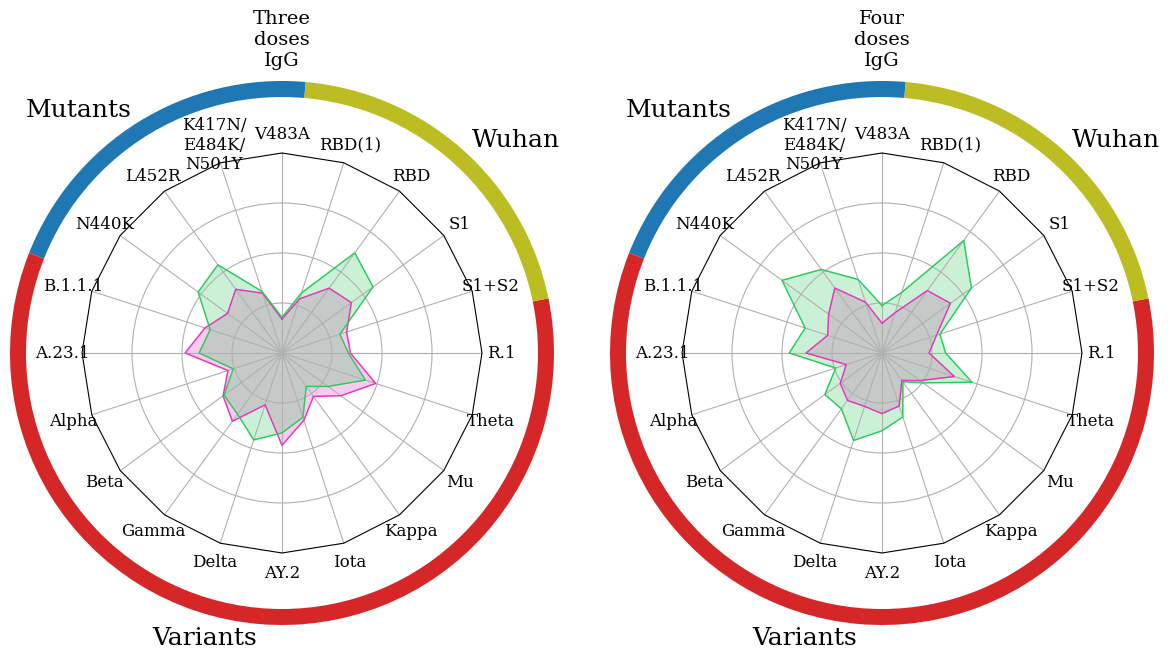

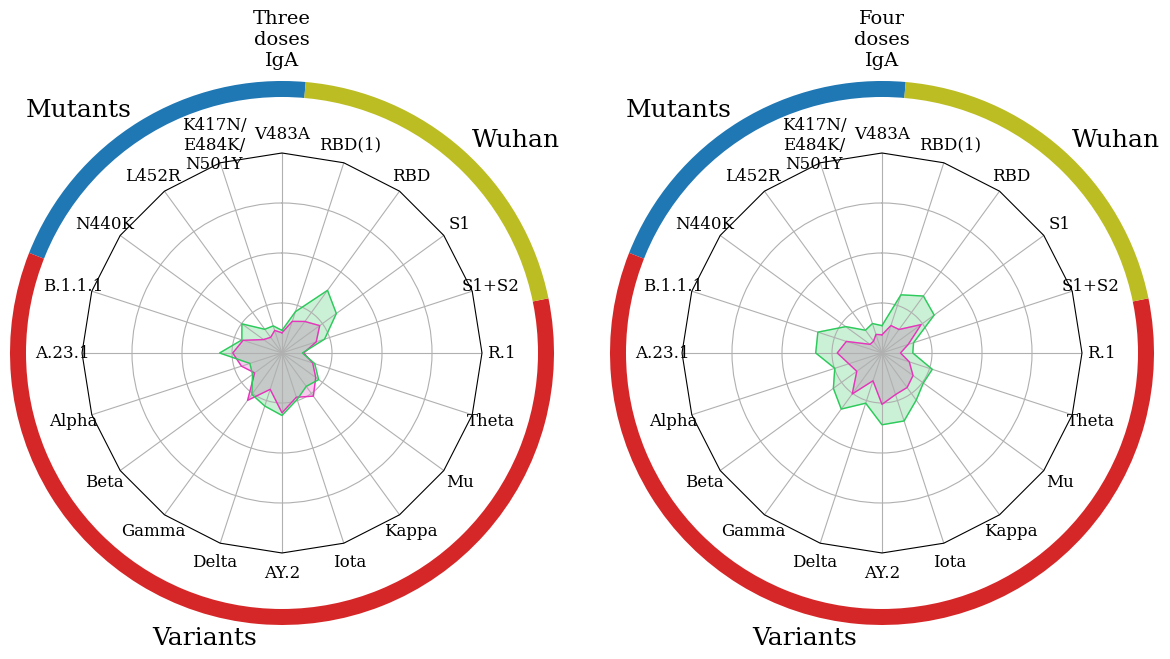

In [46]:
sns.set_context(style_dict["spider"])
all_timepoints = ['T0', 'T1']

for isotype in ['IgG', 'IgA']:
    f, ax = plt.subplots(1, 2, subplot_kw=dict(projection='radar'), figsize=(10, 5))
    f.subplots_adjust(top=1, bottom=0, left=0, right=1, hspace=0.95, wspace=0.5)

    for vac,curr_ax in zip(['all-unvaccinated-infected_T1', 'all-vaccinated-infected_T1'], ax.flatten()):

        sort_by = 'Mutants_magnitude'
        spider_group = 'all'
        curr_columns = spider_n_df.columns
        t0_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T0']), curr_columns]
        t1_data = spider_n_df.loc[','.join([isotype, vac, sort_by, spider_group, 'T1']), curr_columns]
        curr_data = np.array([t0_data.values.tolist(), t1_data.values.tolist()])
       

        cutils.plot_spiderplot_specific_colors(data = curr_data, curr_timepoints = all_timepoints, 
                                    all_timepoints = all_timepoints, 
                                    spoke_labels=spoke_labels.tolist(), title=None, 
                                    donut_sizes= [4.2, 12.2, 4.2],  #  or antigen_sizes
                                    start_angle=85, 
                        donut_labels=antigen_labels, donut_colors=donut_colors_v1,
                        max_value=1, figsize=(6,6), chart_radius=1.7, title_height = 1.27, diff_circles=0.1,
                        ptid_colors_dict = timepoint_colors_dict2, ax_handle=curr_ax, donut_labels_textprop={'size':18})
    ax[0].set_title('Three' + '\n' + 'doses' + '\n' + isotype, x=0.5, y=1.2)
    ax[1].set_title('Four' + '\n' + 'doses' + '\n' + isotype, x=0.5, y=1.2)


### Supplementary Fig.2c

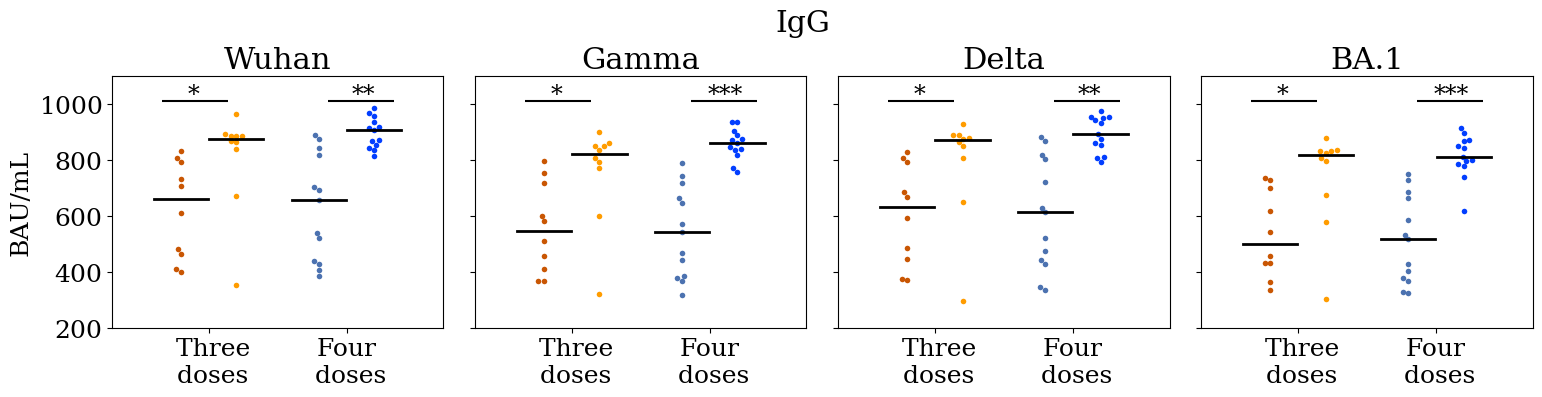

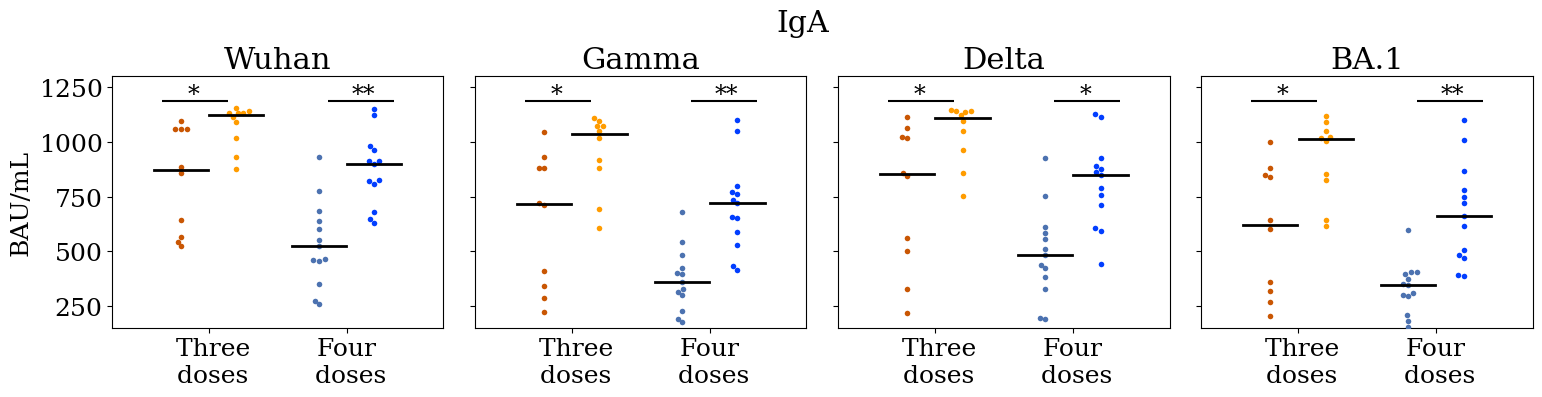

In [47]:
sns.set_context(style_dict["graph"])

elisa_cols = pd.Index(['ELISA Wuhan RBD', 'ELISA Gamma RBD', 'ELISA Delta RBD', 'ELISA Omicron BA.1 RBD'])
elisa_cols_str = pd.Index(['Wuhan', 'Gamma', 'Delta', 'BA.1'])
for isotype in ['IgG', 'IgA']:
 
    curr_cols = elisa_cols + ' ' + isotype + ' BAU/ml'
    curr_df = data_df[data_df['infected T1'] == 'yes'][curr_cols.append(pd.Index(['vaccinated', 'time point']))].dropna().copy()
    cols_str = dict(zip(curr_cols, elisa_cols_str))
    f, ax = cutils.plot_antigen_boxplots_by_timepoints(df=curr_df, antigens=curr_cols, antigen_names=cols_str, group_column='vaccinated', 
                                                group_order=['no', 'yes'], hue_order=['T0', 'T1'], time_column='time point', legend=False, dot_size=4,
                                                y_scale=None, figsize=(16,4.5), showfliers=True, title=isotype, x_label='', sharey=True,
                                                colormap={'d0_cmap':['#4c72b0','#c95603'], 'd30_cmap':['#023eff','#ff9c00']}, savepath=None, annot=True)
    for a in ax:
        a.set_xticklabels(['  Three \n doses', ' Four \n doses'])
        a.set_xlabel('')
        
        if isotype == 'IgA':
            a.set_ylim([150, 1300])

        else:
            a.set_ylim([200, 1100])
            

        formatter = ticker.ScalarFormatter(useMathText=True) 
        a.yaxis.set_major_formatter(formatter) 
    
    ax[0].set_ylabel('BAU/mL')
    plt.suptitle(x=0.527,y=0.9, t=isotype)
    plt.show()

### Supplementary Fig.2d

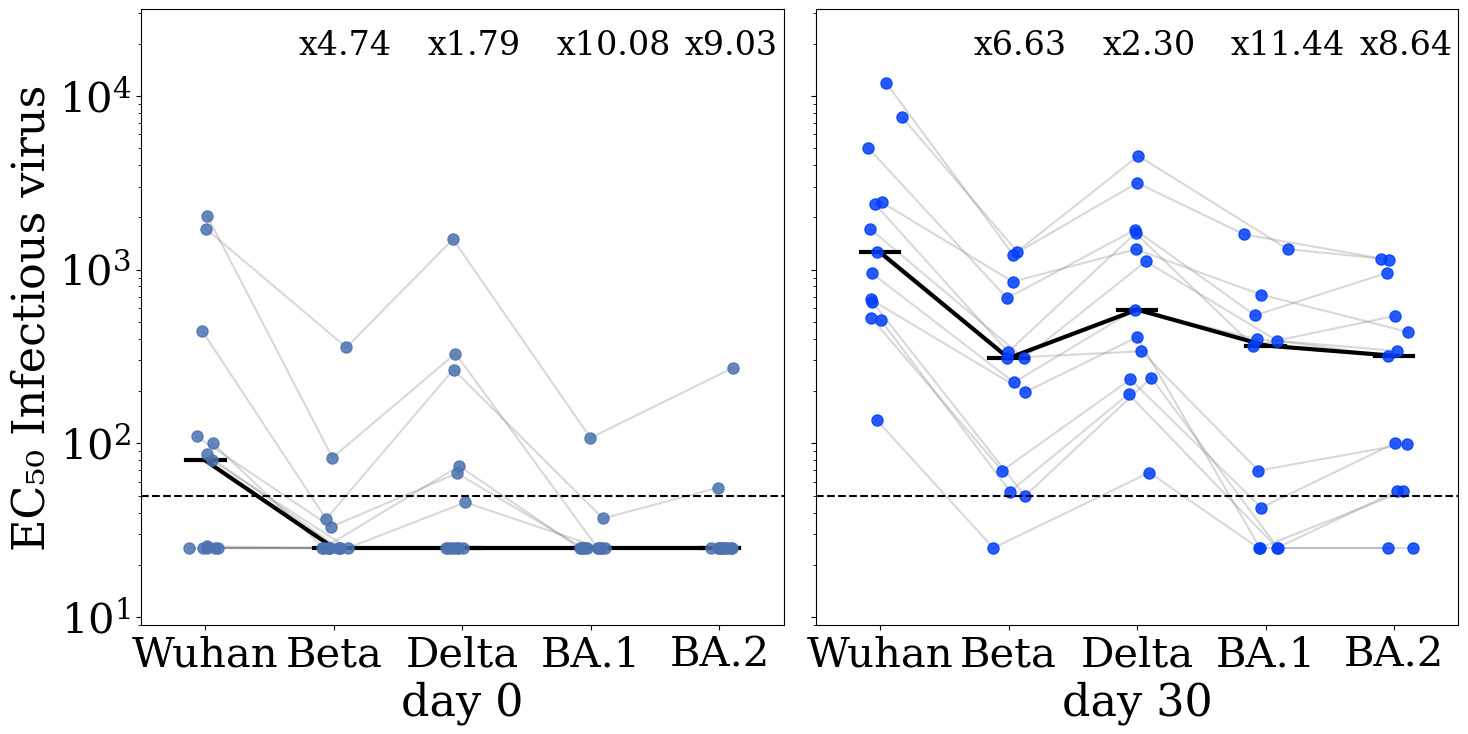

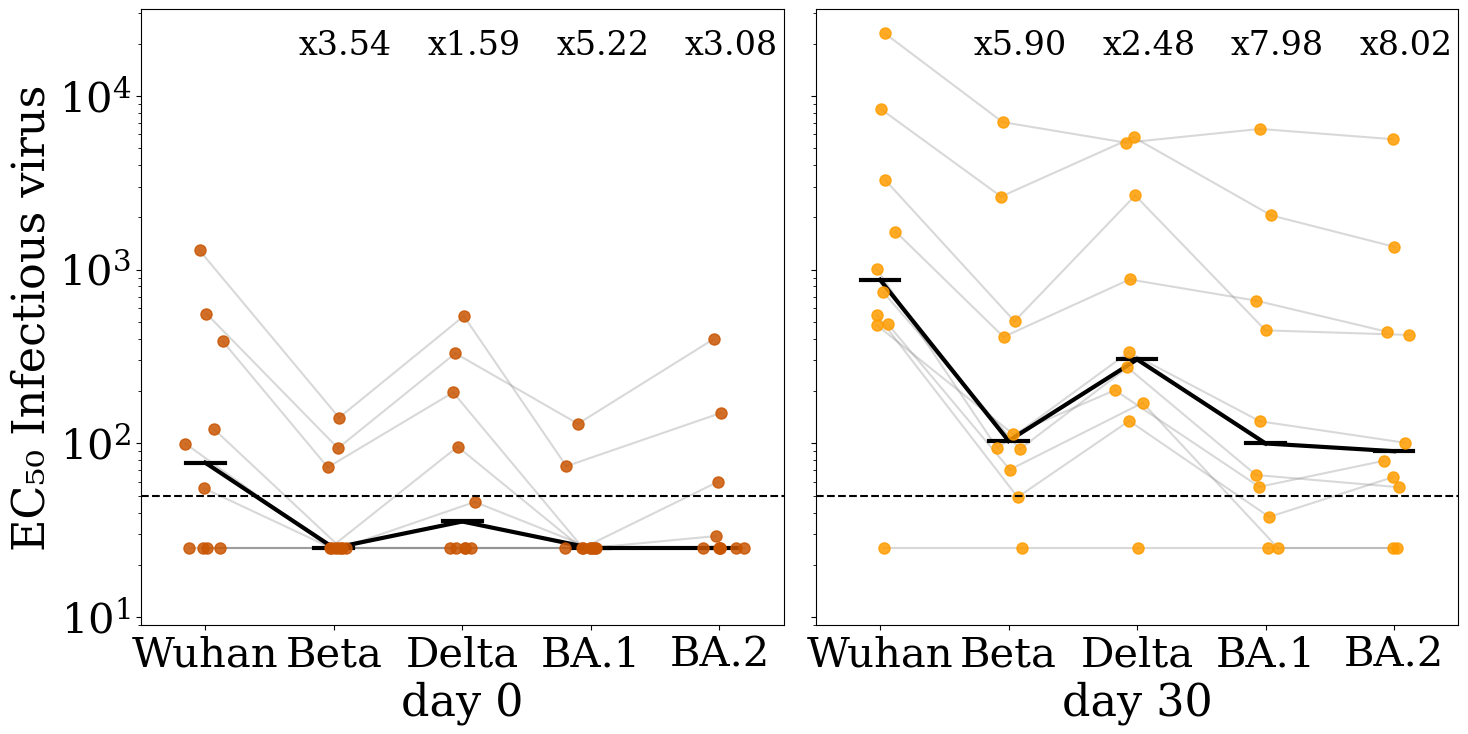

In [48]:
sns.set_context(style_dict["graph"])
for vac_status, colors in zip(['yes','no'], [['#4c72b0', '#023eff'], ['#c95603','#ff9c00']]):
    f,ax = plt.subplots(1,2, figsize=(17,8), sharey=True)
    f.subplots_adjust(wspace=0.05, hspace=0)
    ylim=(9,10**4.5)
    for col, time, color in zip([0,1], ['T0', 'T1'], colors):
        curr_cols = data_df.columns[data_df.columns.str.endswith('Infectious-virus neutralization assay')]
        data = data_df[(data_df['time point']==time)&(data_df['infected T1']=='yes')&(data_df['vaccinated']==vac_status)][curr_cols].dropna().copy()
        data.loc[:, 'ptid'] = data.index.map(lambda x: x.split('_')[0])
        curr_df = pd.melt(data, id_vars=['ptid'], value_vars=curr_cols)
        curr_df.loc[:, 'variant'] = curr_df.loc[:, 'variable'].map(lambda x: x.split(' ')[0])
        order = curr_cols.str.replace(' Infectious-virus neutralization assay','')
        cutils.pair_boxplot(data=curr_df, y=['value'], x='variant',
                            order=order.tolist(), 
                            ptid_recognition='ptid', figsize=(10,8), jitter_scale=0.07, c_plaette=color, alpha=0.85, ax=ax[col],
                             line_color='gray', pair_line_style='-', pair_line_width=1.5, pair_line_alpha=0.3, 
                            backbone='median', median_color='black', median_width=3)
        drop_fold_dict = {}

        wuhan = curr_df[curr_df.variant == 'Wuhan']['value'].values
        for var in order[1:]:
            d_f = wuhan / curr_df[curr_df.variant == var]['value'].values
            drop_fold_dict[var] = d_f.mean()

        for i_ in range(len(order)-1):
            yp_0 = curr_df[curr_df.variant==order[i_]]['value'].median()
            yp_1 = curr_df[curr_df.variant==order[i_+1]]['value'].median()
            xp_0 = i_
            xp_1 = i_+1
            ax[col].plot([xp_0, xp_1], [yp_0, yp_1], color='k',linewidth=3, linestyle='-', zorder=1, alpha=1)
            ax[col].text(i_+1-0.27 , ylim[1]*0.55,'x{0:.2f}'.format(drop_fold_dict[order[i_+1]]), fontsize=24)

        ax[col].set_xlabel('')
        ax[col].set_xticklabels(order, fontsize=30)
        ax[col].set_ylabel('')
        ax[col].hlines(50, -0.5, len(order)-0.5, colors='black', linestyles='--')
        ax[col].set_ylim(ylim)

    ax[0].set_yscale('log')
    ax[0].set_ylabel('EC'+u'\u2085' + u'\u2080 Infectious virus', fontsize=32)
    ax[0].set_xlabel('day 0', fontsize=32)
    ax[1].set_xlabel('day 30', fontsize=32)
    plt.setp(ax[0].get_yticklabels(), fontsize=30)
    plt.show()
    plt.close()

### Supplementary Fig.2e

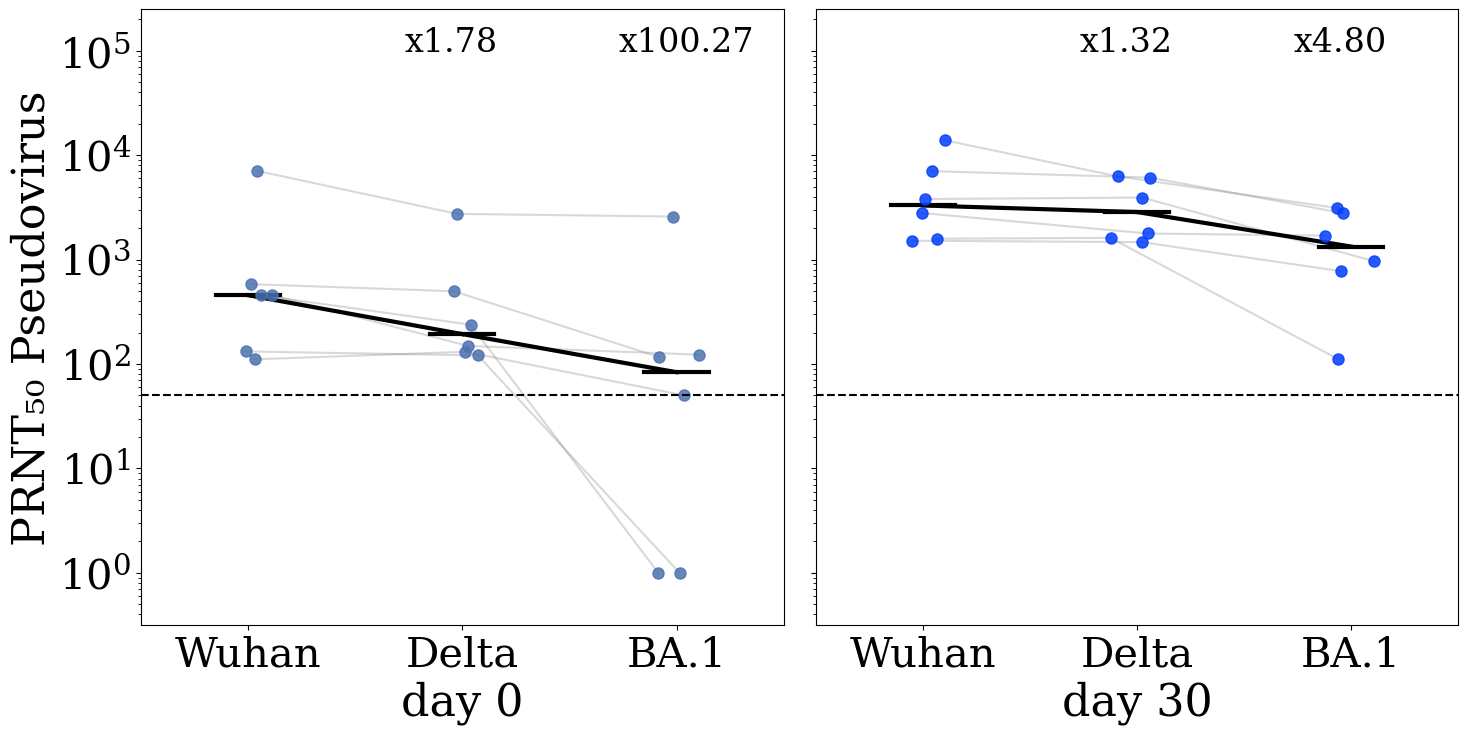

In [49]:
sns.set_context(style_dict["graph"])
f,ax = plt.subplots(1,2, figsize=(17,8), sharey=True)
f.subplots_adjust(wspace=0.05, hspace=0)
ylim=(10**-0.5,10**5.4)
for col, time, color in zip([0,1], ['T0', 'T1'], ['#4c72b0', '#023eff']):
    curr_cols = data_df.columns[data_df.columns.str.endswith('Pseudovirus neutralization assay')]
    data = data_df[(data_df['time point']==time)&(data_df['infected T1']=='yes')&(data_df['vaccinated']=='yes')][curr_cols].dropna().copy()
    data.loc[:, 'ptid'] = data.index.map(lambda x: x.split('_')[0])
    curr_df = pd.melt(data, id_vars=['ptid'], value_vars=curr_cols)
    curr_df.loc[:, 'variant'] = curr_df.loc[:, 'variable'].map(lambda x: x.split(' ')[0])
    order = curr_cols.str.replace(' Pseudovirus neutralization assay','')
    # len_dict[time] = len(data)
    # dot_colors = colormap_dict['{0}_{1}'.format(time, 'yes')]
    cutils.pair_boxplot(data=curr_df, y=['value'], x='variant',
                        order=order.tolist(), 
                        ptid_recognition='ptid', figsize=(10,8), jitter_scale=0.07, c_plaette=color, alpha=0.85, ax=ax[col],
                         line_color='gray', pair_line_style='-', pair_line_width=1.5, pair_line_alpha=0.3, 
                        backbone='median', median_color='black', median_width=3)
    drop_fold_dict = {}
    
    wuhan = curr_df[curr_df.variant == 'Wuhan']['value'].values
    for var in order[1:]:
        d_f = wuhan / curr_df[curr_df.variant == var]['value'].values
        drop_fold_dict[var] = d_f.mean()

    for i_ in range(len(order)-1):
        yp_0 = curr_df[curr_df.variant==order[i_]]['value'].median()
        yp_1 = curr_df[curr_df.variant==order[i_+1]]['value'].median()
        xp_0 = i_
        xp_1 = i_+1
        ax[col].plot([xp_0, xp_1], [yp_0, yp_1], color='k',linewidth=3, linestyle='-', zorder=1, alpha=1)
        ax[col].text(i_+1-0.27 ,ylim[1]*0.4,'x{0:.2f}'.format(drop_fold_dict[order[i_+1]]), fontsize=24)

    ax[col].set_xlabel('')
    ax[col].set_xticklabels(order, fontsize=30)
    ax[col].set_ylabel('')
    ax[col].hlines(50, -0.5, len(order)-0.5, colors='black', linestyles='--')
    ax[col].set_ylim(ylim)

ax[0].set_yscale('log')
ax[0].set_ylabel('PRNT'+u'\u2085' + u'\u2080 Pseudovirus', fontsize=32)
ax[0].set_xlabel('day 0', fontsize=32)
ax[1].set_xlabel('day 30', fontsize=32)
plt.setp(ax[0].get_yticklabels(), fontsize=30)
plt.show()
plt.close()

## Supplementary Fig.3

In [50]:
markers = pd.Index(['Antigen Microarray SARS Cov 2 magnitude', 'Antigen Microarray Variants magnitude', 'Antigen Microarray RBD Mutants magnitude'])
pair_df = data_df[(markers + ' IgG').append(markers + ' IgA')].copy()

In [51]:
corr_df = pair_df.corr(method='pearson').loc[pair_df.columns.str.contains('IgA'), pair_df.columns.str.contains('IgG')]

Text(0.5, 0.85, 'r = 0.233')

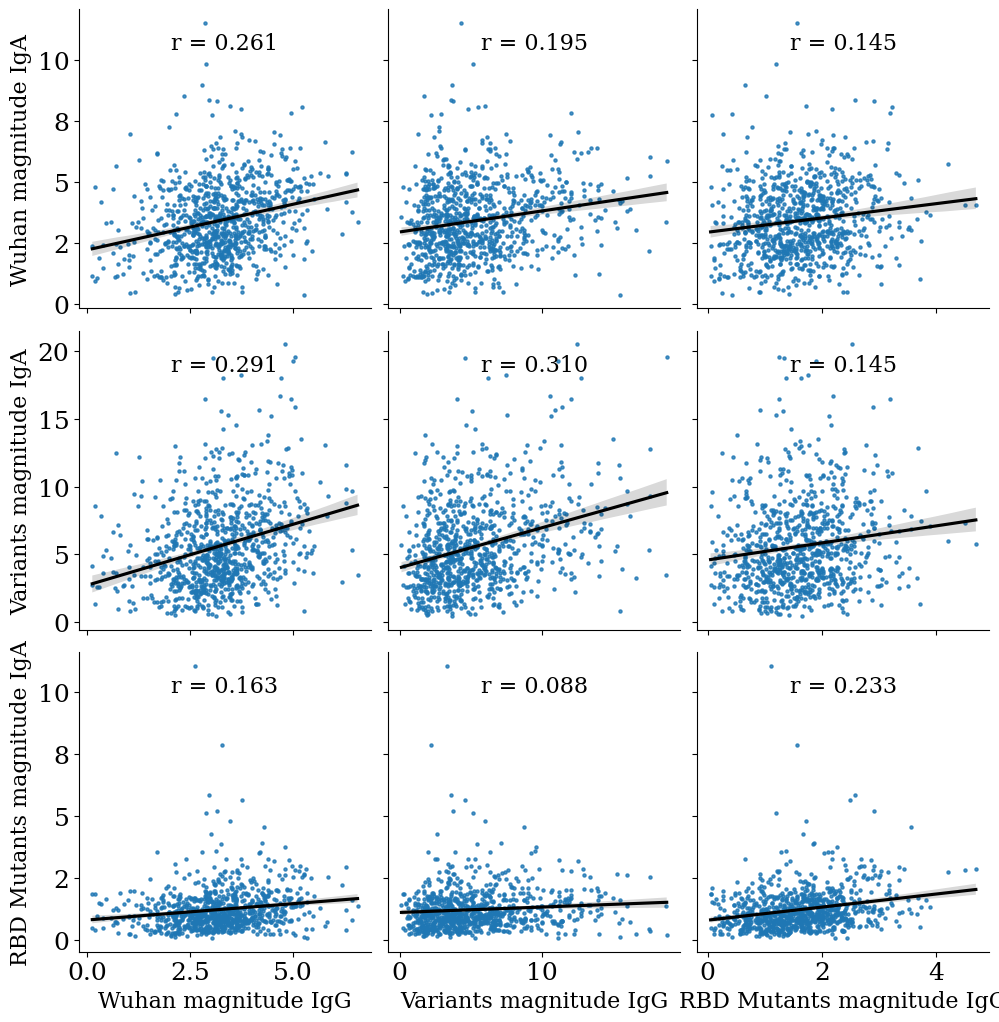

In [52]:
sns.set_context(style_dict["graph"])

f = sns.pairplot(pair_df, x_vars=pair_df.columns[pair_df.columns.str.endswith('IgG')], y_vars=pair_df.columns[pair_df.columns.str.endswith('IgA')], 
             kind='reg', height=3.5, plot_kws={'line_kws':{'color':'black'}, 'scatter_kws':{'s':5}})

f.axes[0,0].set_ylabel('Wuhan magnitude IgA', fontsize=16)
f.axes[1,0].set_ylabel('Variants magnitude IgA', fontsize=16)
f.axes[2,0].set_ylabel('RBD Mutants magnitude IgA', fontsize=16)

f.axes[2,0].set_xlabel('Wuhan magnitude IgG', fontsize=16)
f.axes[2,1].set_xlabel('Variants magnitude IgG', fontsize=16)
f.axes[2,2].set_xlabel('RBD Mutants magnitude IgG', fontsize=16)

f.axes[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
f.axes[1,0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
f.axes[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

f.axes[0,0].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[0], corr_df.columns[0]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[0,0].transAxes)

f.axes[0,1].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[0], corr_df.columns[1]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[0,1].transAxes)

f.axes[0,2].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[0], corr_df.columns[2]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[0,2].transAxes)

f.axes[1,0].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[1], corr_df.columns[0]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[1,0].transAxes)

f.axes[1,1].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[1], corr_df.columns[1]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[1,1].transAxes)

f.axes[1,2].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[1], corr_df.columns[2]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[1,2].transAxes)

f.axes[2,0].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[2], corr_df.columns[0]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[2,0].transAxes)

f.axes[2,1].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[2], corr_df.columns[1]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[2,1].transAxes)

f.axes[2,2].text(0.5, 0.85, 'r = {:.3f}'.format(corr_df.loc[corr_df.index[2], corr_df.columns[2]]), 
                 ha='center', va='bottom', size=16, transform=f.axes[2,2].transAxes)


## Supplementary Fig.4

### Supplementary Fig.4a

### Load data of independent cohort

In [53]:
valid_c_df_april = pd.read_excel('Supplementary Data 8.xlsx', index_col=0, sheet_name='data_up_to_April')
model_values_df_april = pd.read_excel('Supplementary Table 14.xlsx', index_col=0)

In [54]:
str_dict = {'SARS_Cov_2_gmean_magnitude_IgG':'IgG Wuhan', 'SARS_Cov_2_gmean_magnitude_IgA':'IgA Wuhan', 
            'Variants_gmean_magnitude_IgG':'IgG Variants', 'Variants_gmean_magnitude_IgA':'IgA Variants'}

In [55]:
low_high_bars = {}
curr_columns = str_dict.keys()
for a in curr_columns:
    oddsratio, p_value, curr_df, infection_rates =cutils.compute_response_groups_by_antigen_ind(df=valid_c_df_april, antigen=a, infected_col='infected', 
                                                    quantiles=[0.25, 0.75], print_flag=False, p_threshold=1)
    low_high_bars[str_dict[a]] = ( oddsratio, p_value, curr_df, infection_rates)

In [56]:
idx_dict = {}
naive_comb_dict = {}
for col_1, col_2 in zip(['SARS_Cov_2_gmean_magnitude_response_group_IgG', 
                         'SARS_Cov_2_gmean_magnitude_response_group_IgG', 
                         'Variants_gmean_magnitude_response_group_IgG', 
                         'Variants_gmean_magnitude_response_group_IgG'],
                        ['Variants_gmean_magnitude_response_group_IgA', 
                         'SARS_Cov_2_gmean_magnitude_response_group_IgA', 
                         'Variants_gmean_magnitude_response_group_IgA',
                        'SARS_Cov_2_gmean_magnitude_response_group_IgA']):
    curr_comb_str = str_dict[col_1.replace('_response_group', '')]+' and '+str_dict[col_2.replace('_response_group', '')]
    temp_df = pd.DataFrame(index=valid_c_df_april.index)
    for status in ['low', 'high', 'mid']:
        if status != 'mid':
            curr_idx = valid_c_df_april[valid_c_df_april[col_1] == status].index.intersection\
            (valid_c_df_april[valid_c_df_april[col_2] == status].index)
        else:
            curr_idx = valid_c_df_april.index.drop(idx_dict['low'].append(idx_dict['high']))
        curr_df = valid_c_df_april.loc[curr_idx]
        idx_dict[status] = curr_idx
        infected_percent = len(curr_df[curr_df['infected']=='yes']) / len(curr_df)*100
#         print(f'{status}: {infected_percent}%')
        naive_comb_dict[status] = infected_percent
        
        temp_df.loc[curr_idx, curr_comb_str] = status
    low_v, high_v, mid_v = naive_comb_dict.values()
    low_high_bars[curr_comb_str] = (model_values_df_april.loc[curr_comb_str, 'Hazard Ratio'],
                                    model_values_df_april.loc[curr_comb_str, 'p-value'],
                                    temp_df,
                                    {'low':low_v, 'mid':mid_v, 'high':high_v})

In [57]:
marker_list = ['IgA Variants', 'IgA Wuhan', 'IgG Variants', 'IgG Wuhan',
             'IgG Variants and IgA Variants', 'IgG Wuhan and IgA Wuhan',
             'IgG Wuhan and IgA Variants', 'IgG Variants and IgA Wuhan']

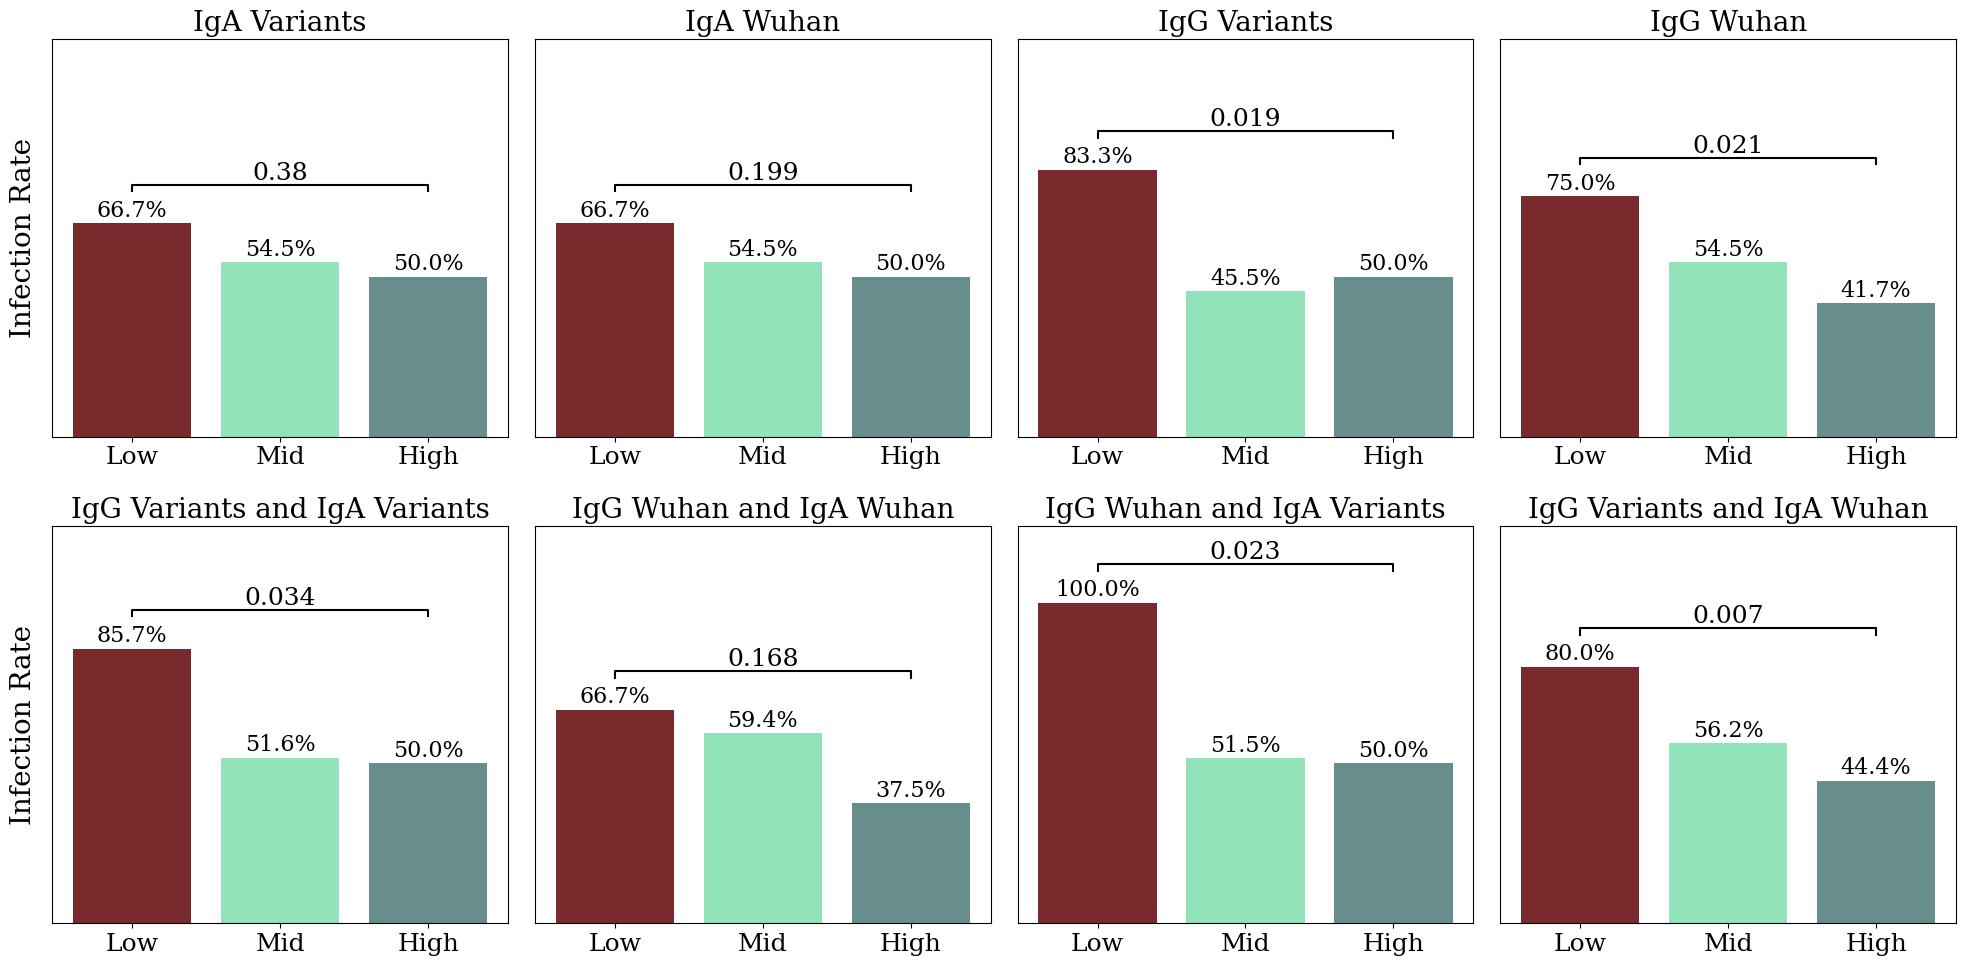

In [58]:
curr_palette = sns.color_palette(['#609492','#85F1B9', '#861D20'][::-1])
f, axes = plt.subplots(2,4, figsize=(20,10), sharey=True)
for marker, ax in zip(marker_list, axes.flatten()):
    odss, p, curr_df, infection_stats = low_high_bars[(marker)]
    sns.barplot(x=[1, 2, 3], y=list(infection_stats.values()),palette=curr_palette, ax=ax)
    ax.set_xticklabels(['Low', 'Mid', 'High'], fontsize=18)
    ax.set_yticklabels('')
    cutils.show_values_on_bars(ax)
    ax.set_title(marker, fontsize=20)
    ax.set_ylabel('')
    x1, x2 = (0, 2) # comparing high to low
    y, h, c = max(list(infection_stats.values())) + 10, 2, 'k'
    ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=c)
    p_str = str(model_values_df_april.loc[marker, 'p-value'])
    ax.text((x1+x2)*.5, y+h, p_str , ha='center', va='bottom', color=c, size=18)
    ax.tick_params(left=False)
    ax.set_ylim(0,124)
axes[0][0].set_ylabel('Infection Rate', fontsize=20)
axes[1][0].set_ylabel('Infection Rate', fontsize=20)
plt.tight_layout()
plt.show()

## Supplementary Fig.5

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 80.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

no vs. yes: Custom statistical test, P_val:1.533e-40


c:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 84.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(37.097222222222214, 0.5, 'Day 30 IgG capsid Bioplex')

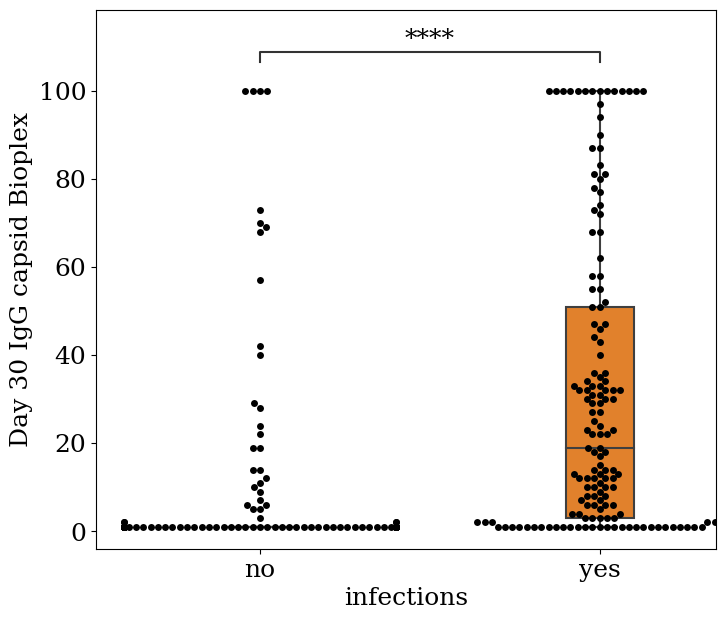

In [59]:
sns.set_context(style_dict["graph"])
curr_df = data_df[data_df['time point']=='T0'].copy()
cap_column = 'result 2 SARS-COV-2 nucleocapsid IgG BioPlex'
f, ax = plt.subplots(1, figsize=(8,7))
sns.boxplot(data=curr_df, x='infected T1', y=cap_column, order=['no','yes'], showfliers=False, ax=ax, width=0.2)
sns.swarmplot(data=curr_df, x='infected T1', y=cap_column, order=['no','yes'], ax=ax, color='black')
stat, p_val = scipy.stats.ranksums(curr_df[curr_df['infected T1'] == 'no'][cap_column].dropna(), 
                                   curr_df[curr_df['infected T1'] == 'yes'][cap_column].dropna())
annotator = Annotator(ax, pairs=[['no','yes']], x='infected T1', y=cap_column, data=curr_df)
annotator.set_pvalues([p_val])
annotator.annotate()
ax.set_xlabel('infections')
ax.set_ylabel('Day 30 IgG capsid Bioplex')